# ÏùºÏÉÅ ÎåÄÌôî ÏöîÏïΩ EDA (Exploratory Data Analysis)

**Î™©Ï†Å**: Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑùÏùÑ ÌÜµÌïú ÏÑ±Îä• Í≥†ÎèÑÌôî Ï†ÑÎûµ ÏàòÎ¶Ω

**Î∂ÑÏÑù Ìï≠Î™©**:
1. **Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏** - Ïª¨Îüº, ÌÉÄÏûÖ, Í≤∞Ï∏°Ïπò
2. **ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÏÑù** - Î¨∏Ïûê Îã®ÏúÑ, ÏïïÏ∂ï ÎπÑÏú®
3. **Ï£ºÏ†ú Î∂ÑÌè¨** - 9,235Í∞ú Í≥†Ïú† Ï£ºÏ†ú
4. **ÌôîÏûê Î∂ÑÏÑù** - ÎåÄÎ∂ÄÎ∂Ñ 2Î™Ö ÎåÄÌôî
5. **Î∞úÌôî Î∂ÑÏÑù** - ÎåÄÌôî ÌÑ¥ Ïàò
6. **ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÏÑù** - KoBART tokenizer Í∏∞Ï§Ä
7. **ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù** - ÏãúÍ∞Ñ, Í∏àÏï°, Ï†ÑÌôîÎ≤àÌò∏ Îì±
8. **PII ÎßàÏä§ÌÇπ Î∂ÑÏÑù** - Í∞úÏù∏Ï†ïÎ≥¥ ÎßàÏä§ÌÇπ Ìå®ÌÑ¥
9. **Î¨∏Ïû• Ïàò Î∂ÑÏÑù** - Î¨∏Ïû• Îã®ÏúÑ ÏïïÏ∂ï ÎπÑÏú®
10. **Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù** - Type-Token Ratio
11. **N-gram Î∂ÑÏÑù** - ÏûêÏ£º ÏÇ¨Ïö©ÎêòÎäî ÌëúÌòÑ
12. **ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå** - Í∏¥ ÎåÄÌôî, Î≥µÏû°Ìïú Íµ¨Ï°∞
13. **Baseline ÏòàÏ∏° ÎπÑÍµê** - ROUGE Ï†êÏàò Î∂ÑÏÑù (Ï°∞Í±¥Î∂Ä)

---

## 1. ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è Îç∞Ïù¥ÌÑ∞ Î°úÎî©

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
import re
from tqdm import tqdm

# tqdm pandas ÌÜµÌï©
tqdm.pandas()

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî© ÏôÑÎ£å")

‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî© ÏôÑÎ£å


In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎî©
train_df = pd.read_csv('../data/train.csv')
dev_df = pd.read_csv('../data/dev.csv')
test_df = pd.read_csv('../data/test.csv')

print(f"Train: {len(train_df):,} samples")
print(f"Dev:   {len(dev_df):,} samples")
print(f"Test:  {len(test_df):,} samples")
print(f"\n‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å")

Train: 12,457 samples
Dev:   499 samples
Test:  499 samples

‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎî© ÏôÑÎ£å


## 2. Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏

In [3]:
# Train Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞
print("=" * 80)
print("Train Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞")
print("=" * 80)
print(f"\nColumns: {list(train_df.columns)}")
print(f"\nData Types:")
print(train_df.dtypes)
print(f"\nÍ≤∞Ï∏°Ïπò:")
print(train_df.isnull().sum())

# ÏÉòÌîå 1Í∞ú ÌôïÏù∏
print("\n" + "=" * 80)
print("ÏÉòÌîå ÏòàÏãú (Train[0])")
print("=" * 80)
sample = train_df.iloc[0]
print(f"\nID: {sample['fname']}")
print(f"\nDialogue (Ï≤òÏùå 200Ïûê):\n{sample['dialogue'][:200]}...")
print(f"\nSummary:\n{sample['summary']}")

Train Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞

Columns: ['fname', 'dialogue', 'summary', 'topic']

Data Types:
fname       object
dialogue    object
summary     object
topic       object
dtype: object

Í≤∞Ï∏°Ïπò:
fname       0
dialogue    0
summary     0
topic       0
dtype: int64

ÏÉòÌîå ÏòàÏãú (Train[0])

ID: train_0

Dialogue (Ï≤òÏùå 200Ïûê):
#Person1#: ÏïàÎÖïÌïòÏÑ∏Ïöî, Mr. Smith. Ï†ÄÎäî Dr. HawkinsÏûÖÎãàÎã§. Ïò§Îäò Î¨¥Ïä® ÏùºÎ°ú Ïò§ÏÖ®Ïñ¥Ïöî? 
#Person2#: Í±¥Í∞ïÍ≤ÄÏßÑÏùÑ Î∞õÏúºÎ†§Í≥† ÏôîÏñ¥Ïöî. 
#Person1#: ÎÑ§, 5ÎÖÑ ÎèôÏïà Í≤ÄÏßÑÏùÑ Ïïà Î∞õÏúºÏÖ®ÎÑ§Ïöî. Îß§ÎÖÑ Ìïú Î≤àÏî© Î∞õÏúºÏÖîÏïº Ìï¥Ïöî. 
#Person2#: ÏïåÏ£†. ÌäπÎ≥ÑÌûà ÏïÑÌîà Îç∞Í∞Ä ÏóÜÏúºÎ©¥ Íµ≥Ïù¥ Í∞à ÌïÑÏöîÍ∞Ä ÏóÜÎã§Í≥† ÏÉùÍ∞ÅÌñàÏñ¥Ïöî. 
#Person...

Summary:
Mr. SmithÎäî Dr. HawkinsÏóêÍ≤å Í±¥Í∞ïÍ≤ÄÏßÑÏùÑ Î∞õÏúºÎü¨ ÏôÄÏÑú, Îß§ÎÖÑ Í≤ÄÏßÑ ÌïÑÏöîÏÑ±ÏùÑ ÏïàÎÇ¥Î∞õÍ≥† Ìù°Ïó∞ ÏäµÍ¥Ä Í∞úÏÑ†ÏùÑ ÏúÑÌïú ÎèÑÏõÄÏùÑ Ï†úÏïàÎ∞õÏïòÏäµÎãàÎã§.


## 3. ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÏÑù

ÎåÄÌôîÏôÄ ÏöîÏïΩÎ¨∏Ïùò Í∏∏Ïù¥ Î∂ÑÌè¨Î•º Î∂ÑÏÑùÌï©ÎãàÎã§.

In [4]:
# ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Í≥ÑÏÇ∞ (Î¨∏Ïûê Îã®ÏúÑ)
def add_length_stats(df, name):
    """ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ Ï∂îÍ∞Ä"""
    df = df.copy()
    df['dialogue_len'] = df['dialogue'].str.len()
    if 'summary' in df.columns:
        df['summary_len'] = df['summary'].str.len()
        df['compression_ratio'] = df['dialogue_len'] / df['summary_len']
    
    print(f"\n{'='*80}")
    print(f"{name} - ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ (Î¨∏Ïûê Îã®ÏúÑ)")
    print(f"{'='*80}")
    print(f"\n[Dialogue Í∏∏Ïù¥]")
    print(df['dialogue_len'].describe())
    
    if 'summary' in df.columns:
        print(f"\n[Summary Í∏∏Ïù¥]")
        print(df['summary_len'].describe())
        print(f"\n[ÏïïÏ∂ï ÎπÑÏú® (dialogue/summary)]")
        print(df['compression_ratio'].describe())
    
    return df

# ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
train_df = add_length_stats(train_df, "Train")
dev_df = add_length_stats(dev_df, "Dev")
test_df = add_length_stats(test_df, "Test")


Train - ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ (Î¨∏Ïûê Îã®ÏúÑ)

[Dialogue Í∏∏Ïù¥]
count    12457.000000
mean       406.083487
std        197.566083
min         84.000000
25%        280.000000
50%        369.000000
75%        500.000000
max       2165.000000
Name: dialogue_len, dtype: float64

[Summary Í∏∏Ïù¥]
count    12457.000000
mean        85.789436
std         33.811948
min         13.000000
25%         61.000000
50%         80.000000
75%        104.000000
max        376.000000
Name: summary_len, dtype: float64

[ÏïïÏ∂ï ÎπÑÏú® (dialogue/summary)]
count    12457.000000
mean         4.848251
std          1.704514
min          1.010000
25%          3.703125
50%          4.607843
75%          5.707692
max         19.846154
Name: compression_ratio, dtype: float64

Dev - ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ ÌÜµÍ≥Ñ (Î¨∏Ïûê Îã®ÏúÑ)

[Dialogue Í∏∏Ïù¥]
count     499.000000
mean      400.054108
std       186.163807
min       114.000000
25%       273.000000
50%       367.000000
75%       487.000000
max      1269.000000
Name: d

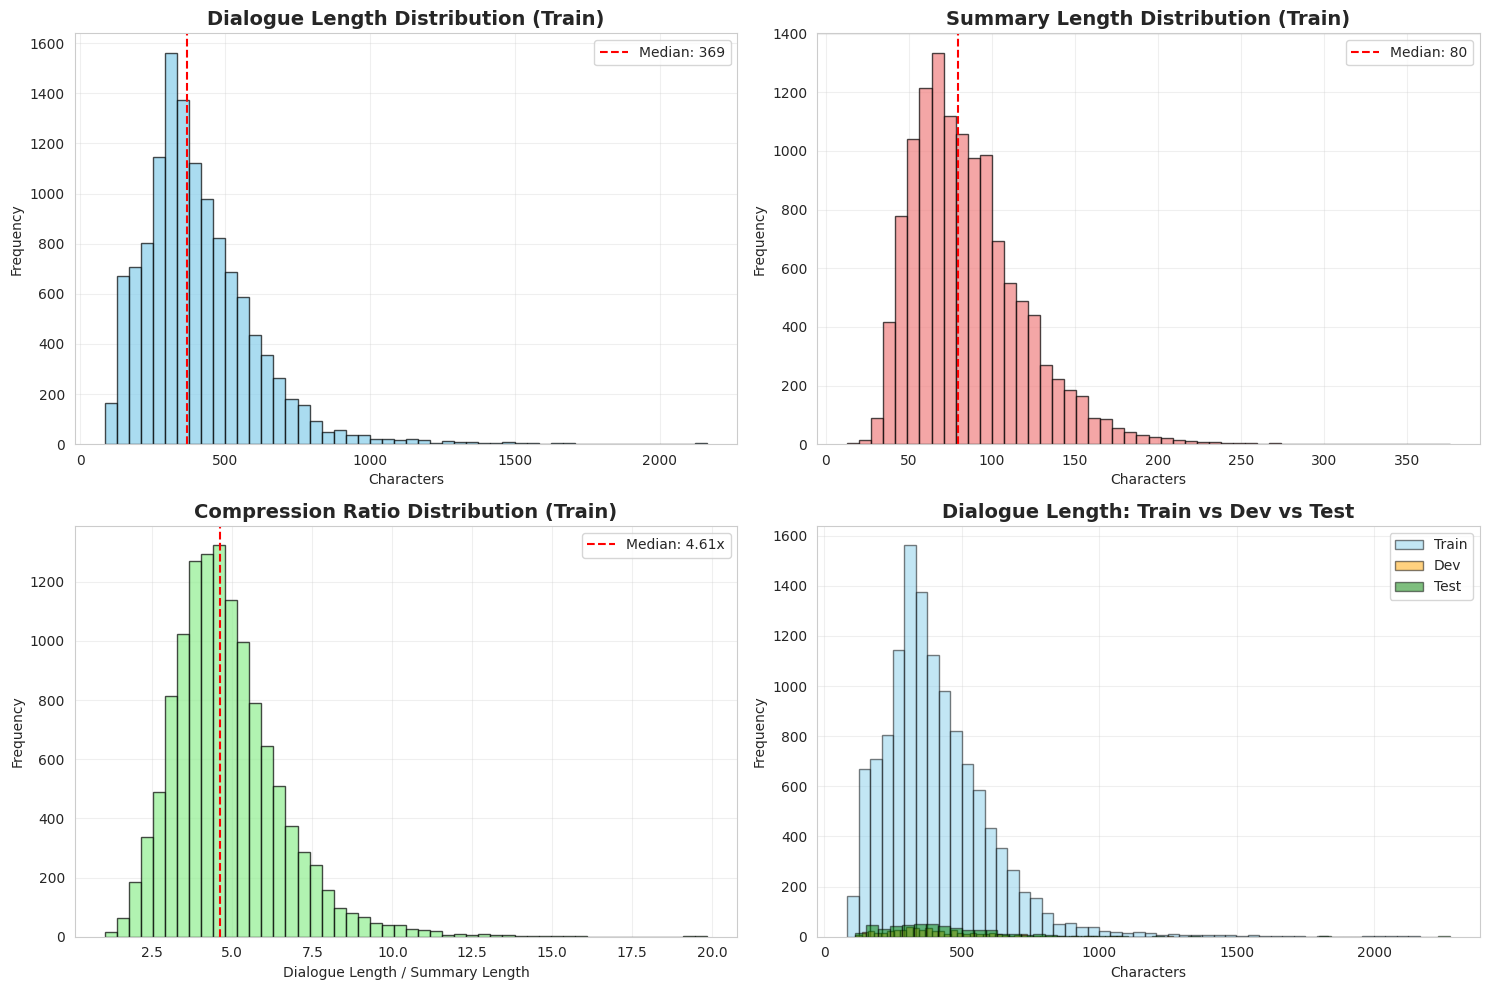


‚úÖ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî ÏôÑÎ£å


In [5]:
# ÏãúÍ∞ÅÌôî: ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Dialogue Í∏∏Ïù¥ (Train)
axes[0, 0].hist(train_df['dialogue_len'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(train_df['dialogue_len'].median(), color='red', linestyle='--', label=f'Median: {train_df["dialogue_len"].median():.0f}')
axes[0, 0].set_title('Dialogue Length Distribution (Train)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Characters')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Summary Í∏∏Ïù¥ (Train)
axes[0, 1].hist(train_df['summary_len'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].axvline(train_df['summary_len'].median(), color='red', linestyle='--', label=f'Median: {train_df["summary_len"].median():.0f}')
axes[0, 1].set_title('Summary Length Distribution (Train)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Characters')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Compression Ratio (Train)
axes[1, 0].hist(train_df['compression_ratio'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].axvline(train_df['compression_ratio'].median(), color='red', linestyle='--', label=f'Median: {train_df["compression_ratio"].median():.2f}x')
axes[1, 0].set_title('Compression Ratio Distribution (Train)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Dialogue Length / Summary Length')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Train vs Dev vs Test Dialogue Í∏∏Ïù¥ ÎπÑÍµê
axes[1, 1].hist(train_df['dialogue_len'], bins=50, alpha=0.5, label='Train', color='skyblue', edgecolor='black')
axes[1, 1].hist(dev_df['dialogue_len'], bins=50, alpha=0.5, label='Dev', color='orange', edgecolor='black')
axes[1, 1].hist(test_df['dialogue_len'], bins=50, alpha=0.5, label='Test', color='green', edgecolor='black')
axes[1, 1].set_title('Dialogue Length: Train vs Dev vs Test', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Characters')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n‚úÖ ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî ÏôÑÎ£å")

## 4. Ï£ºÏ†ú(Topic) Î∂ÑÏÑù

`topic` Ïª¨ÎüºÏùò Î∂ÑÌè¨Î•º Î∂ÑÏÑùÌï©ÎãàÎã§.

In [6]:
# topic Î∂ÑÏÑù (Îã®Ïùº Î¨∏ÏûêÏó¥ ÌòïÌÉú)
print("\n" + "="*80)
print("Ï£ºÏ†ú(Topic) Î∂ÑÌè¨ Î∂ÑÏÑù")
print("="*80)

# Train topic Î∂ÑÌè¨
topic_counts = train_df['topic'].value_counts()
print(f"\nÏ¥ù Í≥†Ïú† Ï£ºÏ†ú Ïàò (Train): {len(topic_counts)}")
print(f"\nÏÉÅÏúÑ 20Í∞ú Ï£ºÏ†ú:")
print("="*80)
for topic, count in topic_counts.head(20).items():
    print(f"{topic:30s}: {count:4d} ({count/len(train_df)*100:5.2f}%)")

# Dev topic Î∂ÑÌè¨
print("\n" + "="*80)
print(f"Ï¥ù Í≥†Ïú† Ï£ºÏ†ú Ïàò (Dev): {len(dev_df['topic'].value_counts())}")

# TestÏóêÎäî topic ÏóÜÏùå (Ï∂îÎ°† ÎåÄÏÉÅ)
if 'topic' in test_df.columns:
    print(f"Ï¥ù Í≥†Ïú† Ï£ºÏ†ú Ïàò (Test): {len(test_df['topic'].value_counts())}")


Ï£ºÏ†ú(Topic) Î∂ÑÌè¨ Î∂ÑÏÑù

Ï¥ù Í≥†Ïú† Ï£ºÏ†ú Ïàò (Train): 9235

ÏÉÅÏúÑ 20Í∞ú Ï£ºÏ†ú:
ÏùåÏãù Ï£ºÎ¨∏                         :  130 ( 1.04%)
Ï∑®ÏóÖ Î©¥Ï†ë                         :  109 ( 0.88%)
Í∏∏ ÏïàÎÇ¥                          :   66 ( 0.53%)
Ìò∏ÌÖî Ï≤¥ÌÅ¨Ïù∏                        :   40 ( 0.32%)
ÏïÑÌååÌä∏ ÏûÑÎåÄ                        :   30 ( 0.24%)
ÏùºÏÉÅ ÎåÄÌôî                         :   29 ( 0.23%)
ÏáºÌïë                            :   27 ( 0.22%)
Ï£ºÎßê Í≥ÑÌöç                         :   26 ( 0.21%)
Î©¥Ï†ë                            :   25 ( 0.20%)
Ìò∏ÌÖî ÏòàÏïΩ                         :   25 ( 0.20%)
Ïó¨Ìñâ Í≥ÑÌöç                         :   23 ( 0.18%)
Ìï≠Í≥µÍ∂å ÏòàÏïΩ                        :   22 ( 0.18%)
ÏòÅÌôî Í∞êÏÉÅ                         :   21 ( 0.17%)
ÏûëÎ≥Ñ Ïù∏ÏÇ¨                         :   21 ( 0.17%)
Ìú¥Í∞Ä Í≥ÑÌöç                         :   21 ( 0.17%)
Í∞ÄÍ≤© ÌòëÏÉÅ                         :   20 ( 0.16%)
ÌÉùÏãú Ïù¥Ïö©                         :   20 ( 0.16%

/tmp/ipykernel_3489856/588413191.py:10: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/588413191.py:10: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/588413191.py:10: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/588413191.py:10: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/588413191.py:10: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/588413191.py:10: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/588413191.py:10: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  

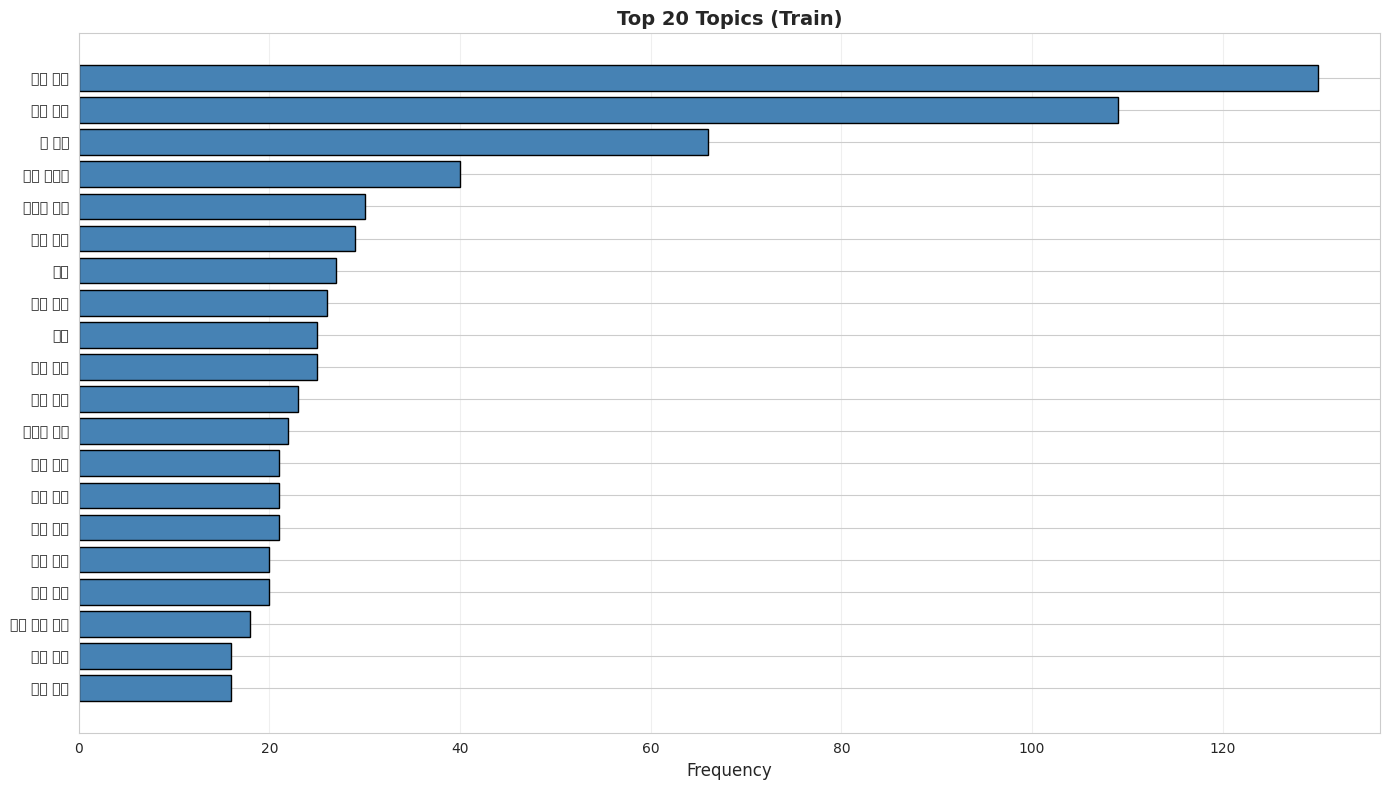


‚úÖ Ï£ºÏ†ú Î∂ÑÌè¨ Î∂ÑÏÑù ÏôÑÎ£å


In [7]:
# ÏãúÍ∞ÅÌôî: ÏÉÅÏúÑ 20Í∞ú Ï£ºÏ†ú
top_topics = topic_counts.head(20)

plt.figure(figsize=(14, 8))
plt.barh(range(len(top_topics)), top_topics.values[::-1], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_topics)), top_topics.index[::-1])
plt.xlabel('Frequency', fontsize=12)
plt.title('Top 20 Topics (Train)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n‚úÖ Ï£ºÏ†ú Î∂ÑÌè¨ Î∂ÑÏÑù ÏôÑÎ£å")

## 5. ÌôîÏûê(Speaker) Î∂ÑÏÑù


ÌôîÏûê Ïàò Î∂ÑÌè¨ (Train):
num_speakers
2    12335
3      107
4       10
5        3
6        1
7        1
Name: count, dtype: int64


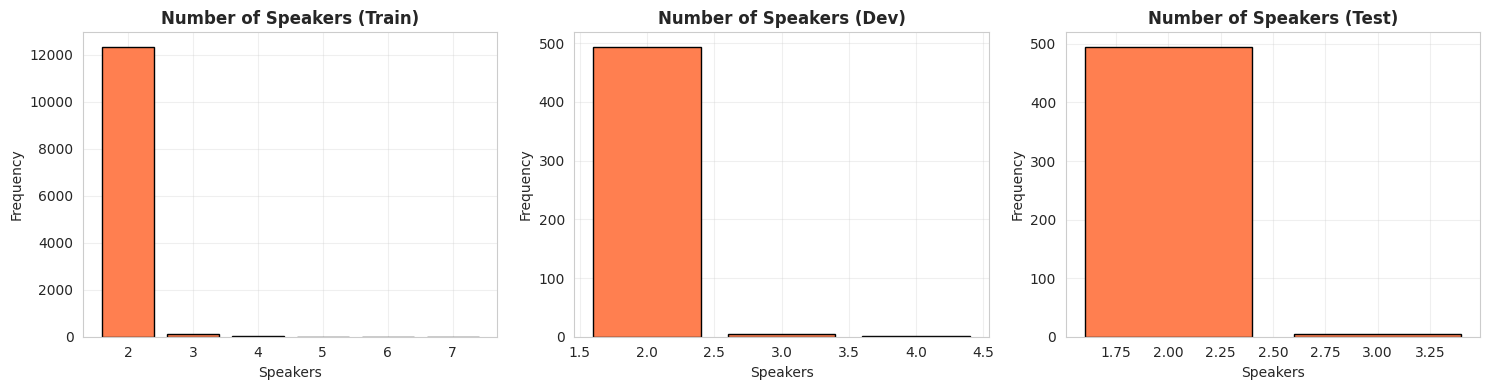


‚úÖ ÌôîÏûê Î∂ÑÏÑù ÏôÑÎ£å


In [8]:
# ÌôîÏûê Ïàò Í≥ÑÏÇ∞
def count_speakers(dialogue):
    """ÎåÄÌôîÏóêÏÑú Í≥†Ïú† ÌôîÏûê Ïàò Í≥ÑÏÇ∞"""
    # "#Person1#", "#Person2#" Ìå®ÌÑ¥ Ï∞æÍ∏∞
    speakers = re.findall(r'#Person\d+#', dialogue)
    return len(set(speakers))

train_df['num_speakers'] = train_df['dialogue'].apply(count_speakers)
dev_df['num_speakers'] = dev_df['dialogue'].apply(count_speakers)
test_df['num_speakers'] = test_df['dialogue'].apply(count_speakers)

print("\nÌôîÏûê Ïàò Î∂ÑÌè¨ (Train):")
print(train_df['num_speakers'].value_counts().sort_index())

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (df, name) in enumerate([(train_df, 'Train'), (dev_df, 'Dev'), (test_df, 'Test')]):
    speaker_counts = df['num_speakers'].value_counts().sort_index()
    axes[idx].bar(speaker_counts.index, speaker_counts.values, color='coral', edgecolor='black')
    axes[idx].set_title(f'Number of Speakers ({name})', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Speakers')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n‚úÖ ÌôîÏûê Î∂ÑÏÑù ÏôÑÎ£å")

## 6. Î∞úÌôî(Utterance) Î∂ÑÏÑù


Î∞úÌôî Ïàò ÌÜµÍ≥Ñ (Train):
count    12457.000000
mean         9.484707
std          4.145838
min          2.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         59.000000
Name: num_utterances, dtype: float64


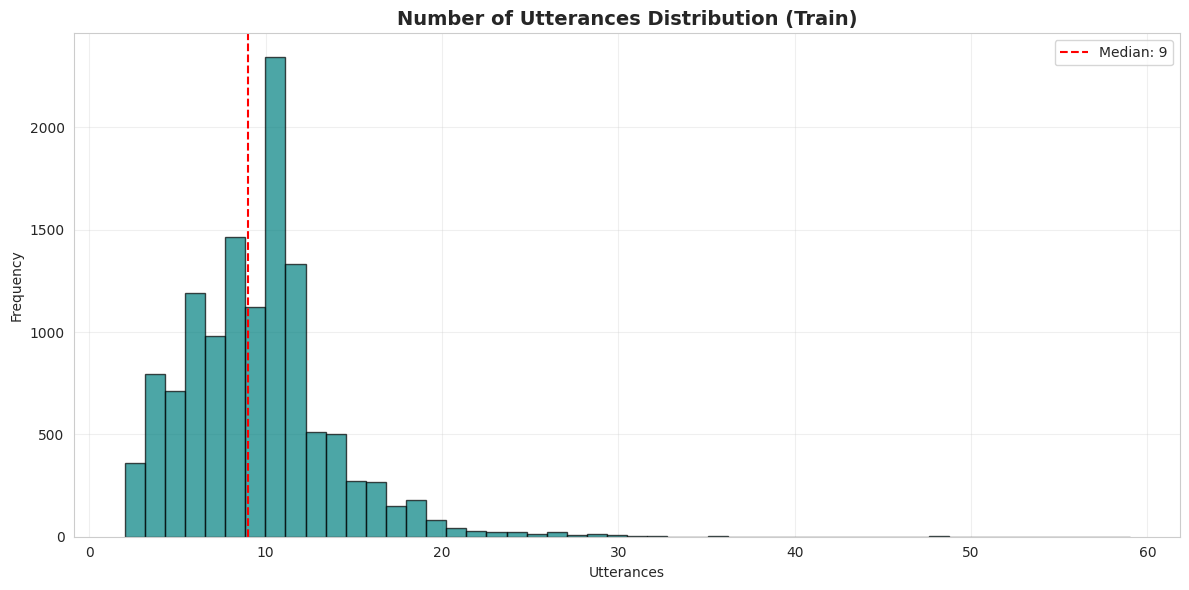


‚úÖ Î∞úÌôî Î∂ÑÏÑù ÏôÑÎ£å


In [9]:
# Î∞úÌôî Ïàò Í≥ÑÏÇ∞ (Ï§ÑÎ∞îÍøà Í∏∞Ï§Ä)
def count_utterances(dialogue):
    """ÎåÄÌôîÏóêÏÑú Î∞úÌôî Ïàò Í≥ÑÏÇ∞ (#Person Ìå®ÌÑ¥ Í∞úÏàò)"""
    return len(re.findall(r'#Person\d+#:', dialogue))

train_df['num_utterances'] = train_df['dialogue'].apply(count_utterances)
dev_df['num_utterances'] = dev_df['dialogue'].apply(count_utterances)
test_df['num_utterances'] = test_df['dialogue'].apply(count_utterances)

print("\nÎ∞úÌôî Ïàò ÌÜµÍ≥Ñ (Train):")
print(train_df['num_utterances'].describe())

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.hist(train_df['num_utterances'], bins=50, alpha=0.7, color='teal', edgecolor='black')
plt.axvline(train_df['num_utterances'].median(), color='red', linestyle='--', 
            label=f'Median: {train_df["num_utterances"].median():.0f}')
plt.title('Number of Utterances Distribution (Train)', fontsize=14, fontweight='bold')
plt.xlabel('Utterances')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n‚úÖ Î∞úÌôî Î∂ÑÏÑù ÏôÑÎ£å")

## 7. ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÏÑù (KoBART Tokenizer)

**Î™©Ï†Å**: KoBART Î™®Îç∏Ïùò ÏûÖÎ†• Ï†úÏïΩ ÌôïÏù∏
- Encoder max length: 512 tokens
- Decoder max length: 100 tokens
- Ï¥àÍ≥º ÏÉòÌîå ÌôïÏù∏ Î∞è truncation ÏòÅÌñ• Î∂ÑÏÑù

In [10]:
# KoBART Tokenizer Î°úÎìú
from transformers import AutoTokenizer

print("ÌÜ†ÌÅ∞ÎùºÏù¥Ï†Ä Î°úÎî© Ï§ë...")
tokenizer = AutoTokenizer.from_pretrained('digit82/kobart-summarization')
print(f"‚úÖ Tokenizer Î°úÎìú ÏôÑÎ£å (Vocab size: {len(tokenizer):,})")

# ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Í≥ÑÏÇ∞ Ìï®Ïàò
def count_tokens(text, tokenizer):
    """ÌÖçÏä§Ìä∏Î•º ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† Í∞úÏàò Î∞òÌôò"""
    return len(tokenizer.encode(text, add_special_tokens=True))

# Train Îç∞Ïù¥ÌÑ∞ ÌÜ†ÌÅ∞Ìôî (tqdmÏúºÎ°ú ÏßÑÌñâÏÉÅÌô© ÌëúÏãú)
print("\nÌÜ†ÌÅ∞Ìôî ÏßÑÌñâ Ï§ë...")
print("Train dialogue ÌÜ†ÌÅ∞Ìôî...")
train_df['dialogue_tokens'] = train_df['dialogue'].progress_apply(lambda x: count_tokens(x, tokenizer))
print("Train summary ÌÜ†ÌÅ∞Ìôî...")
train_df['summary_tokens'] = train_df['summary'].progress_apply(lambda x: count_tokens(x, tokenizer))

print("Dev dialogue ÌÜ†ÌÅ∞Ìôî...")
dev_df['dialogue_tokens'] = dev_df['dialogue'].progress_apply(lambda x: count_tokens(x, tokenizer))
print("Dev summary ÌÜ†ÌÅ∞Ìôî...")
dev_df['summary_tokens'] = dev_df['summary'].progress_apply(lambda x: count_tokens(x, tokenizer))

print("Test dialogue ÌÜ†ÌÅ∞Ìôî...")
test_df['dialogue_tokens'] = test_df['dialogue'].progress_apply(lambda x: count_tokens(x, tokenizer))

print("\n‚úÖ ÌÜ†ÌÅ∞Ìôî ÏôÑÎ£å")

# ÌÜµÍ≥Ñ Ï∂úÎ†•
print("\n" + "="*80)
print("ÌÜ†ÌÅ∞ Í∏∏Ïù¥ ÌÜµÍ≥Ñ (Train)")
print("="*80)
print("\n[Dialogue Tokens]")
print(train_df['dialogue_tokens'].describe())
print("\n[Summary Tokens]")
print(train_df['summary_tokens'].describe())

# 512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º Î∂ÑÏÑù (Encoder)
over_512 = train_df[train_df['dialogue_tokens'] > 512]
print(f"\n‚ö†Ô∏è  Dialogue 512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º: {len(over_512):,} samples ({len(over_512)/len(train_df)*100:.2f}%)")
print(f"   ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: {train_df['dialogue_tokens'].max():,} tokens")

# 100 ÌÜ†ÌÅ∞ Ï¥àÍ≥º Î∂ÑÏÑù (Decoder)
over_100 = train_df[train_df['summary_tokens'] > 100]
print(f"\n‚ö†Ô∏è  Summary 100 ÌÜ†ÌÅ∞ Ï¥àÍ≥º: {len(over_100):,} samples ({len(over_100)/len(train_df)*100:.2f}%)")
print(f"   ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: {train_df['summary_tokens'].max():,} tokens")

# Î¨∏Ïûê Ïàò vs ÌÜ†ÌÅ∞ Ïàò ÎπÑÏú®
train_df['char_to_token_ratio'] = train_df['dialogue_len'] / train_df['dialogue_tokens']
print(f"\nÌèâÍ∑† Î¨∏Ïûê/ÌÜ†ÌÅ∞ ÎπÑÏú®: {train_df['char_to_token_ratio'].mean():.2f}")
print(f"(ÌïúÍµ≠Ïñ¥ ÌèâÍ∑†: 1 ÌÜ†ÌÅ∞ ‚âà {train_df['char_to_token_ratio'].mean():.2f} Î¨∏Ïûê)")

/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:945: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


ÌÜ†ÌÅ∞ÎùºÏù¥Ï†Ä Î°úÎî© Ï§ë...
‚úÖ Tokenizer Î°úÎìú ÏôÑÎ£å (Vocab size: 30,000)

ÌÜ†ÌÅ∞Ìôî ÏßÑÌñâ Ï§ë...
Train dialogue ÌÜ†ÌÅ∞Ìôî...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12457/12457 [00:02<00:00, 5200.14it/s]


Train summary ÌÜ†ÌÅ∞Ìôî...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 12457/12457 [00:00<00:00, 15499.36it/s]


Dev dialogue ÌÜ†ÌÅ∞Ìôî...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 499/499 [00:00<00:00, 5076.21it/s]


Dev summary ÌÜ†ÌÅ∞Ìôî...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 499/499 [00:00<00:00, 15410.24it/s]


Test dialogue ÌÜ†ÌÅ∞Ìôî...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 499/499 [00:00<00:00, 4902.62it/s]


‚úÖ ÌÜ†ÌÅ∞Ìôî ÏôÑÎ£å

ÌÜ†ÌÅ∞ Í∏∏Ïù¥ ÌÜµÍ≥Ñ (Train)

[Dialogue Tokens]
count    12457.000000
mean       199.561532
std         93.123736
min         42.000000
25%        141.000000
50%        183.000000
75%        245.000000
max       1079.000000
Name: dialogue_tokens, dtype: float64

[Summary Tokens]
count    12457.000000
mean        39.971984
std         15.149897
min          6.000000
25%         29.000000
50%         37.000000
75%         48.000000
max        161.000000
Name: summary_tokens, dtype: float64

‚ö†Ô∏è  Dialogue 512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º: 136 samples (1.09%)
   ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: 1,079 tokens

‚ö†Ô∏è  Summary 100 ÌÜ†ÌÅ∞ Ï¥àÍ≥º: 48 samples (0.39%)
   ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: 161 tokens

ÌèâÍ∑† Î¨∏Ïûê/ÌÜ†ÌÅ∞ ÎπÑÏú®: 2.03
(ÌïúÍµ≠Ïñ¥ ÌèâÍ∑†: 1 ÌÜ†ÌÅ∞ ‚âà 2.03 Î¨∏Ïûê)


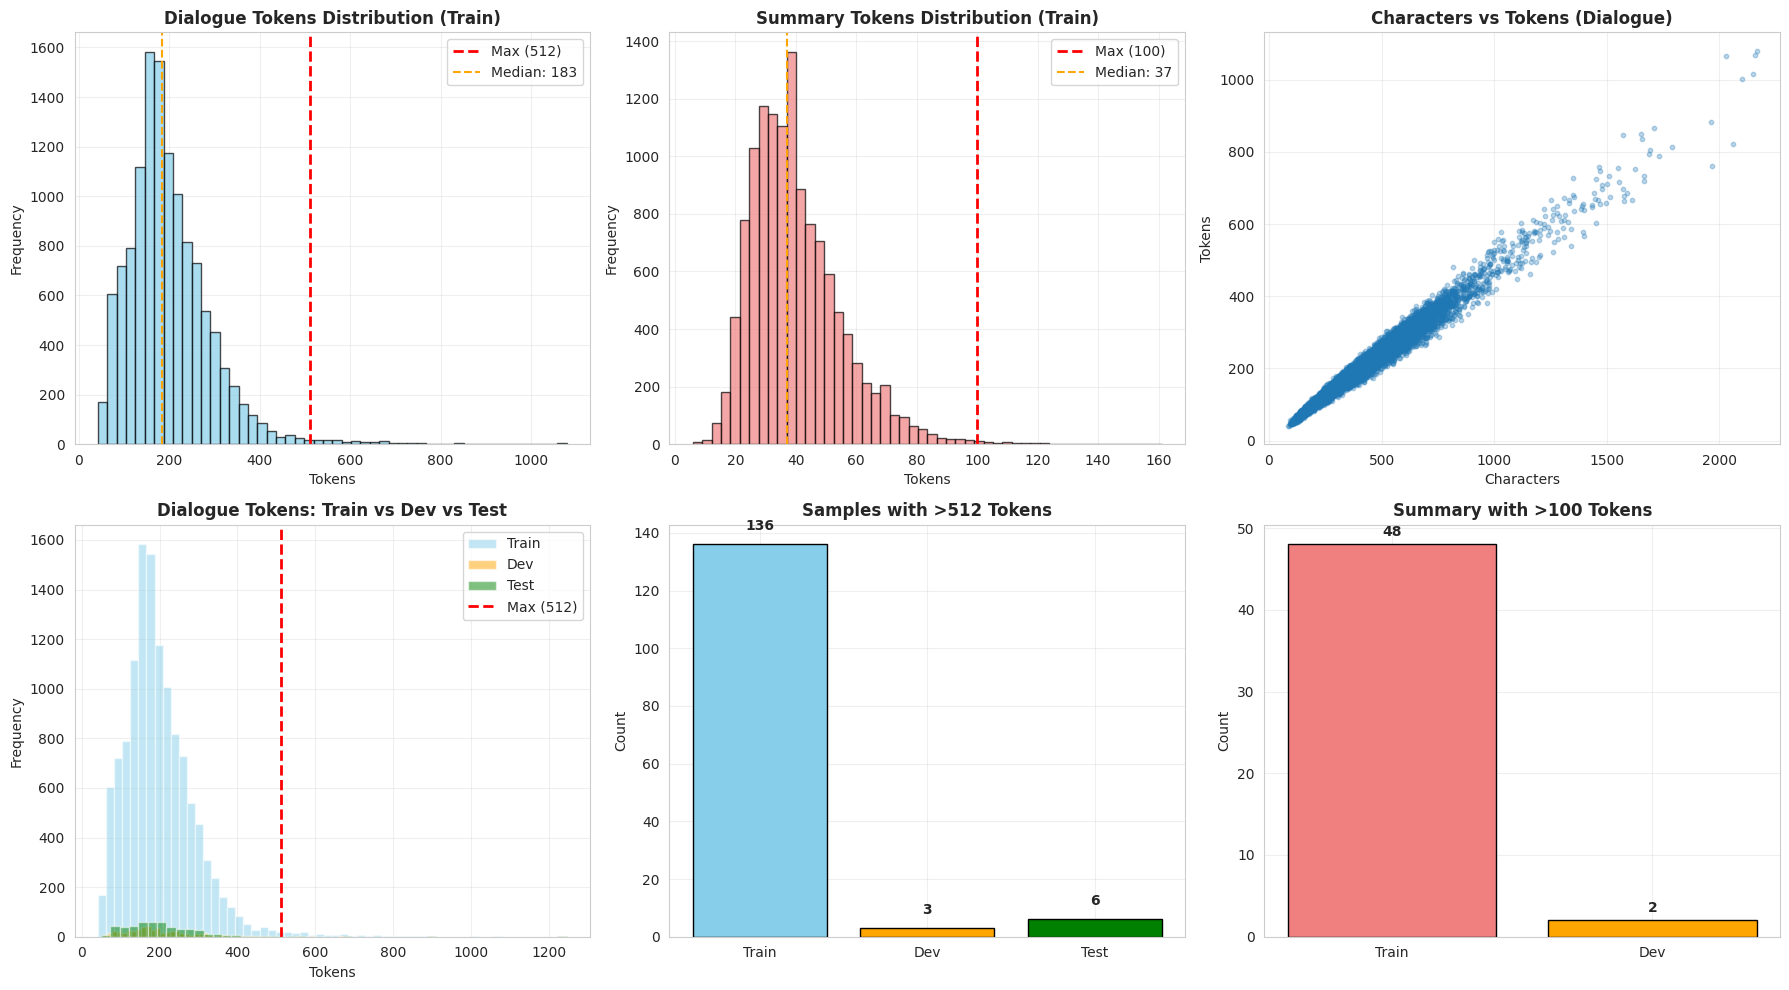


‚úÖ ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÏÑù ÏôÑÎ£å


In [11]:
# ÏãúÍ∞ÅÌôî: ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÌè¨
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Dialogue Tokens (Train)
axes[0, 0].hist(train_df['dialogue_tokens'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(512, color='red', linestyle='--', linewidth=2, label='Max (512)')
axes[0, 0].axvline(train_df['dialogue_tokens'].median(), color='orange', linestyle='--', label=f'Median: {train_df["dialogue_tokens"].median():.0f}')
axes[0, 0].set_title('Dialogue Tokens Distribution (Train)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Tokens')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Summary Tokens (Train)
axes[0, 1].hist(train_df['summary_tokens'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].axvline(100, color='red', linestyle='--', linewidth=2, label='Max (100)')
axes[0, 1].axvline(train_df['summary_tokens'].median(), color='orange', linestyle='--', label=f'Median: {train_df["summary_tokens"].median():.0f}')
axes[0, 1].set_title('Summary Tokens Distribution (Train)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Tokens')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Î¨∏Ïûê vs ÌÜ†ÌÅ∞ ÎπÑÏú®
axes[0, 2].scatter(train_df['dialogue_len'], train_df['dialogue_tokens'], alpha=0.3, s=10)
axes[0, 2].set_title('Characters vs Tokens (Dialogue)', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Characters')
axes[0, 2].set_ylabel('Tokens')
axes[0, 2].grid(alpha=0.3)

# Train vs Dev vs Test Dialogue Tokens
axes[1, 0].hist(train_df['dialogue_tokens'], bins=50, alpha=0.5, label='Train', color='skyblue')
axes[1, 0].hist(dev_df['dialogue_tokens'], bins=50, alpha=0.5, label='Dev', color='orange')
axes[1, 0].hist(test_df['dialogue_tokens'], bins=50, alpha=0.5, label='Test', color='green')
axes[1, 0].axvline(512, color='red', linestyle='--', linewidth=2, label='Max (512)')
axes[1, 0].set_title('Dialogue Tokens: Train vs Dev vs Test', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tokens')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 512 Ï¥àÍ≥º ÏÉòÌîå Î∂ÑÏÑù
truncation_analysis = pd.DataFrame({
    'Dataset': ['Train', 'Dev', 'Test'],
    'Over 512': [
        (train_df['dialogue_tokens'] > 512).sum(),
        (dev_df['dialogue_tokens'] > 512).sum(),
        (test_df['dialogue_tokens'] > 512).sum()
    ]
})
axes[1, 1].bar(truncation_analysis['Dataset'], truncation_analysis['Over 512'], color=['skyblue', 'orange', 'green'], edgecolor='black')
axes[1, 1].set_title('Samples with >512 Tokens', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Count')
axes[1, 1].grid(alpha=0.3)
for i, v in enumerate(truncation_analysis['Over 512']):
    axes[1, 1].text(i, v + 5, str(v), ha='center', fontweight='bold')

# 100 Ï¥àÍ≥º ÏÉòÌîå Î∂ÑÏÑù (Summary)
summary_over = pd.DataFrame({
    'Dataset': ['Train', 'Dev'],
    'Over 100': [
        (train_df['summary_tokens'] > 100).sum(),
        (dev_df['summary_tokens'] > 100).sum()
    ]
})
axes[1, 2].bar(summary_over['Dataset'], summary_over['Over 100'], color=['lightcoral', 'orange'], edgecolor='black')
axes[1, 2].set_title('Summary with >100 Tokens', fontsize=12, fontweight='bold')
axes[1, 2].set_ylabel('Count')
axes[1, 2].grid(alpha=0.3)
for i, v in enumerate(summary_over['Over 100']):
    axes[1, 2].text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n‚úÖ ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÏÑù ÏôÑÎ£å")

## 8. ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù

**Î™©Ï†Å**: ÏãúÍ∞Ñ, Í∏àÏï°, Ï†ÑÌôîÎ≤àÌò∏ Îì± ÌäπÏàò Ìå®ÌÑ¥ ÎπàÎèÑ Î∂ÑÏÑù
- Special Token Ï†ÑÎûµ ÏàòÎ¶ΩÏóê ÌôúÏö©
- Îç∞Ïù¥ÌÑ∞ ÌäπÏÑ± ÌååÏïÖ

ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù Ï§ë...

[ÏãúÍ∞Ñ]
  Ï¥ù Ï∂úÌòÑ ÌöüÏàò: 8,764
  Ìè¨Ìï® ÏÉòÌîå Ïàò: 3,642 (29.24%)

[Í∏àÏï°]
  Ï¥ù Ï∂úÌòÑ ÌöüÏàò: 1,664
  Ìè¨Ìï® ÏÉòÌîå Ïàò: 935 (7.51%)

[Ï†ÑÌôîÎ≤àÌò∏_ÎßàÏä§ÌÇπ]
  Ï¥ù Ï∂úÌòÑ ÌöüÏàò: 228
  Ìè¨Ìï® ÏÉòÌîå Ïàò: 151 (1.21%)

[Ï£ºÏÜå_ÎßàÏä§ÌÇπ]
  Ï¥ù Ï∂úÌòÑ ÌöüÏàò: 89
  Ìè¨Ìï® ÏÉòÌîå Ïàò: 81 (0.65%)

[Ïó¨Í∂åÎ≤àÌò∏_ÎßàÏä§ÌÇπ]
  Ï¥ù Ï∂úÌòÑ ÌöüÏàò: 7
  Ìè¨Ìï® ÏÉòÌîå Ïàò: 5 (0.04%)

[Ïà´Ïûê]
  Ï¥ù Ï∂úÌòÑ ÌöüÏàò: 133,405
  Ìè¨Ìï® ÏÉòÌîå Ïàò: 12,457 (100.00%)



/tmp/ipykernel_3489856/4011354875.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/4011354875.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/4011354875.py:61: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/4011354875.py:61: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/4011354875.py:61: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/4011354875.py:61: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/4011354875.py:61: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) Dej

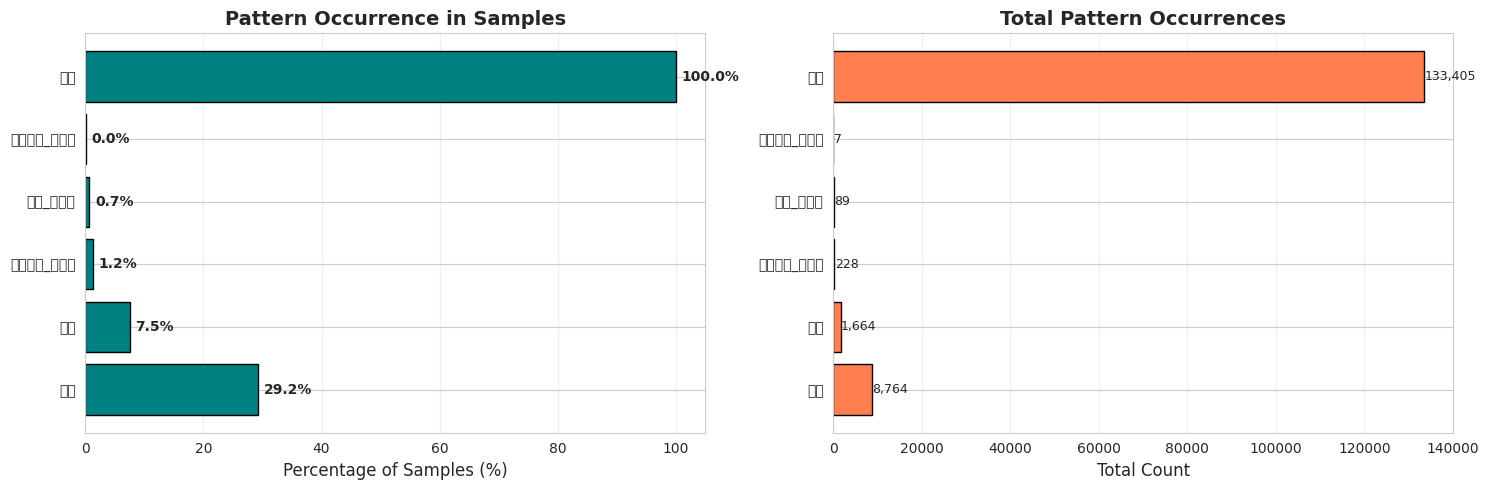


‚úÖ ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù ÏôÑÎ£å


In [12]:
# ÌäπÏàò Ìå®ÌÑ¥ Ï†ïÍ∑úÏãù Ï†ïÏùò
import re

patterns = {
    'ÏãúÍ∞Ñ': r'\d+Ïãú|\d+Î∂Ñ|\d+Ï¥à|Ïò§Ï†Ñ|Ïò§ÌõÑ|ÎÇ¥Ïùº|Ïñ¥Ï†ú|Îã§ÏùåÏ£º|ÏßÄÎÇúÏ£º|\d+Ïõî|\d+Ïùº|\d+ÎÖÑÎèÑ|\d+Í∞úÏõî',
    'Í∏àÏï°': r'\d+Ïõê|\d+ÎßåÏõê|\d+Ïñµ|\$\d+|\d+Îã¨Îü¨|\d+,\d+Ïõê',
    'Ï†ÑÌôîÎ≤àÌò∏_ÎßàÏä§ÌÇπ': r'#PhoneNumber#',
    'Ï£ºÏÜå_ÎßàÏä§ÌÇπ': r'#Address#',
    'Ïó¨Í∂åÎ≤àÌò∏_ÎßàÏä§ÌÇπ': r'#PassportNumber#',
    'Ïà´Ïûê': r'\d+',
}

def count_patterns(text, pattern):
    """ÌÖçÏä§Ìä∏ÏóêÏÑú Ìå®ÌÑ¥ Í∞úÏàò ÏÑ∏Í∏∞"""
    return len(re.findall(pattern, text))

# Í∞Å Ìå®ÌÑ¥Î≥Ñ ÎπàÎèÑ Í≥ÑÏÇ∞
print("ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù Ï§ë...\n")
pattern_results = {}

for pattern_name, pattern_regex in patterns.items():
    train_df[f'pattern_{pattern_name}'] = train_df['dialogue'].apply(lambda x: count_patterns(x, pattern_regex))
    
    total_count = train_df[f'pattern_{pattern_name}'].sum()
    samples_with_pattern = (train_df[f'pattern_{pattern_name}'] > 0).sum()
    
    pattern_results[pattern_name] = {
        'total_count': total_count,
        'samples_with_pattern': samples_with_pattern,
        'percentage': samples_with_pattern / len(train_df) * 100
    }
    
    print(f"[{pattern_name}]")
    print(f"  Ï¥ù Ï∂úÌòÑ ÌöüÏàò: {total_count:,}")
    print(f"  Ìè¨Ìï® ÏÉòÌîå Ïàò: {samples_with_pattern:,} ({samples_with_pattern/len(train_df)*100:.2f}%)")
    print()

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ìå®ÌÑ¥Î≥Ñ Ï∂úÌòÑ ÏÉòÌîå ÎπÑÏú®
pattern_names = list(pattern_results.keys())
percentages = [pattern_results[name]['percentage'] for name in pattern_names]

axes[0].barh(pattern_names, percentages, color='teal', edgecolor='black')
axes[0].set_xlabel('Percentage of Samples (%)', fontsize=12)
axes[0].set_title('Pattern Occurrence in Samples', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(percentages):
    axes[0].text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

# Ìå®ÌÑ¥Î≥Ñ Ï¥ù Ï∂úÌòÑ ÌöüÏàò
counts = [pattern_results[name]['total_count'] for name in pattern_names]
axes[1].barh(pattern_names, counts, color='coral', edgecolor='black')
axes[1].set_xlabel('Total Count', fontsize=12)
axes[1].set_title('Total Pattern Occurrences', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(counts):
    axes[1].text(v + 100, i, f'{v:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n‚úÖ ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù ÏôÑÎ£å")

## 9. PII ÎßàÏä§ÌÇπ Ìå®ÌÑ¥ Î∂ÑÏÑù

**Î™©Ï†Å**: Í∞úÏù∏Ï†ïÎ≥¥ ÎßàÏä§ÌÇπ Ìå®ÌÑ¥ ÌôïÏù∏
- #Person1#, #Person2# Îì± ÌôîÏûê ÎßàÏä§ÌÇπ
- #PhoneNumber#, #Address# Îì± ÎØºÍ∞êÏ†ïÎ≥¥ ÎßàÏä§ÌÇπ

PII ÎßàÏä§ÌÇπ Ìå®ÌÑ¥ Î∂ÑÏÑù

[Person]
  Train: 12,457 samples (100.00%)
  Dev:   499 samples (100.00%)

[PhoneNumber]
  Train: 151 samples (1.21%)
  Dev:   5 samples (1.00%)

[Address]
  Train: 81 samples (0.65%)
  Dev:   2 samples (0.40%)

[PassportNumber]
  Train: 5 samples (0.04%)
  Dev:   0 samples (0.00%)

[CardNumber]
  Train: 12 samples (0.10%)
  Dev:   0 samples (0.00%)

[DateOfBirth]
  Train: 20 samples (0.16%)
  Dev:   2 samples (0.40%)



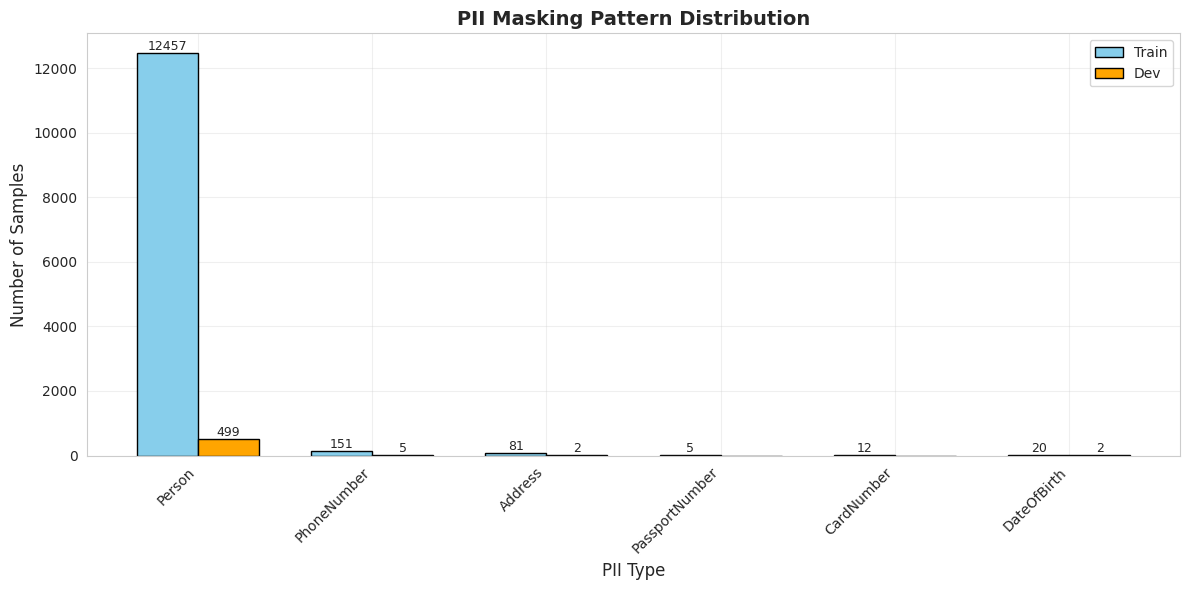

‚úÖ PII ÎßàÏä§ÌÇπ Ìå®ÌÑ¥ Î∂ÑÏÑù ÏôÑÎ£å


In [13]:
# PII Ìå®ÌÑ¥ Ï†ïÏùò
pii_patterns = {
    'Person': r'#Person\d+#',
    'PhoneNumber': r'#PhoneNumber#',
    'Address': r'#Address#',
    'PassportNumber': r'#PassportNumber#',
    'CardNumber': r'#CardNumber#',
    'DateOfBirth': r'#DateOfBirth#'
}

print("PII ÎßàÏä§ÌÇπ Ìå®ÌÑ¥ Î∂ÑÏÑù\n")
print("="*80)

pii_results = {}
for pii_name, pii_regex in pii_patterns.items():
    train_df[f'pii_{pii_name}'] = train_df['dialogue'].apply(lambda x: count_patterns(x, pii_regex))
    dev_df[f'pii_{pii_name}'] = dev_df['dialogue'].apply(lambda x: count_patterns(x, pii_regex))
    
    train_count = (train_df[f'pii_{pii_name}'] > 0).sum()
    dev_count = (dev_df[f'pii_{pii_name}'] > 0).sum()
    
    pii_results[pii_name] = {
        'train': train_count,
        'dev': dev_count
    }
    
    print(f"[{pii_name}]")
    print(f"  Train: {train_count:,} samples ({train_count/len(train_df)*100:.2f}%)")
    print(f"  Dev:   {dev_count:,} samples ({dev_count/len(dev_df)*100:.2f}%)")
    print()

# ÏãúÍ∞ÅÌôî
pii_names = list(pii_results.keys())
train_counts = [pii_results[name]['train'] for name in pii_names]
dev_counts = [pii_results[name]['dev'] for name in pii_names]

x = np.arange(len(pii_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, train_counts, width, label='Train', color='skyblue', edgecolor='black')
bars2 = ax.bar(x + width/2, dev_counts, width, label='Dev', color='orange', edgecolor='black')

ax.set_xlabel('PII Type', fontsize=12)
ax.set_ylabel('Number of Samples', fontsize=12)
ax.set_title('PII Masking Pattern Distribution', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(pii_names, rotation=45, ha='right')
ax.legend()
ax.grid(alpha=0.3)

# Í∞í ÌëúÏãú
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("‚úÖ PII ÎßàÏä§ÌÇπ Ìå®ÌÑ¥ Î∂ÑÏÑù ÏôÑÎ£å")

## 10. Î¨∏Ïû• Ïàò Î∂ÑÏÑù

**Î™©Ï†Å**: ÎåÄÌôîÏôÄ ÏöîÏïΩÏùò Î¨∏Ïû• Ïàò ÌååÏïÖ
- Î¨∏Ïû• Îã®ÏúÑ ÏïïÏ∂ï ÎπÑÏú® Í≥ÑÏÇ∞
- ÏöîÏïΩ Ïä§ÌÉÄÏùº ÌååÏïÖ

Î¨∏Ïû• Ïàò Í≥ÑÏÇ∞ Ï§ë...

Î¨∏Ïû• Ïàò ÌÜµÍ≥Ñ (Train)

[Dialogue Î¨∏Ïû• Ïàò]
count    12457.000000
mean        16.404672
std          8.133703
min          2.000000
25%         11.000000
50%         15.000000
75%         20.000000
max         95.000000
Name: dialogue_sentences, dtype: float64

[Summary Î¨∏Ïû• Ïàò]
count    12457.000000
mean         1.680822
std          0.820271
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          9.000000
Name: summary_sentences, dtype: float64

[Î¨∏Ïû• ÏïïÏ∂ï ÎπÑÏú® (dialogue/summary)]
count    12457.000000
mean        10.692895
std          5.043586
min          1.500000
25%          7.000000
50%         10.000000
75%         13.000000
max         63.000000
Name: sentence_compression_ratio, dtype: float64


/tmp/ipykernel_3489856/783857341.py:83: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/783857341.py:83: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/783857341.py:83: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/783857341.py:83: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/py

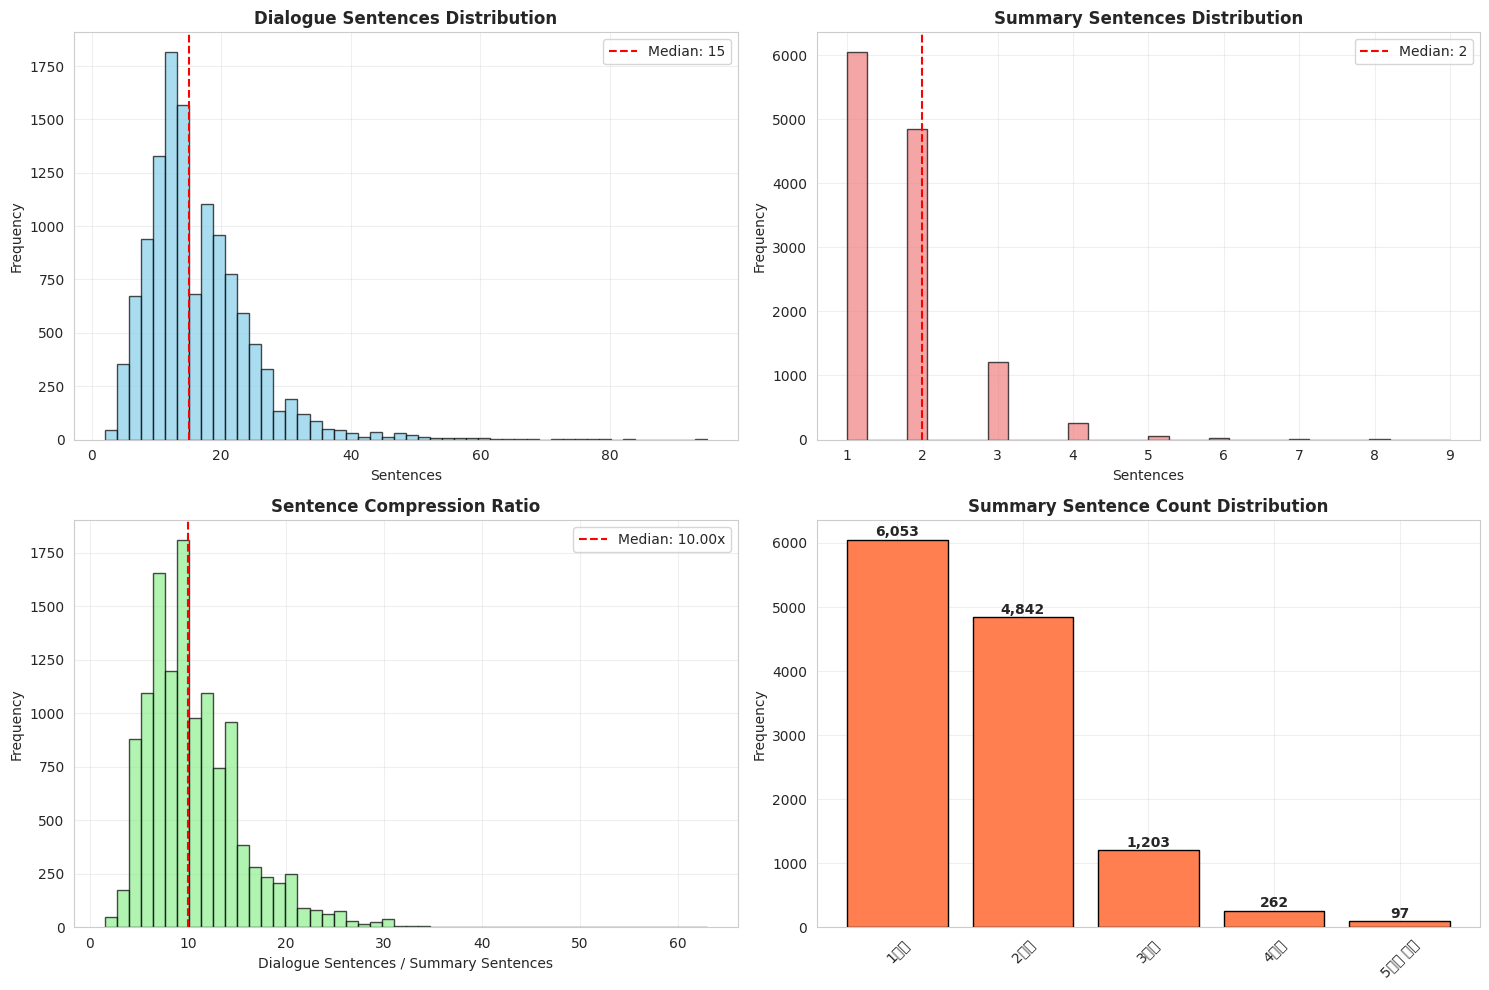


‚úÖ Î¨∏Ïû• Ïàò Î∂ÑÏÑù ÏôÑÎ£å


In [14]:
# Î¨∏Ïû• Î∂ÑÎ¶¨ Ìï®Ïàò (ÌïúÍµ≠Ïñ¥ Í∏∞Ï§Ä)
def count_sentences(text):
    """ÌïúÍµ≠Ïñ¥ Î¨∏Ïû• Í∞úÏàò ÏÑ∏Í∏∞ (. ! ? Í∏∞Ï§Ä)"""
    sentences = re.split(r'[.!?]\s+', text)
    # Îπà Î¨∏ÏûêÏó¥ Ï†úÍ±∞
    sentences = [s for s in sentences if s.strip()]
    return len(sentences)

print("Î¨∏Ïû• Ïàò Í≥ÑÏÇ∞ Ï§ë...\n")

# Train
train_df['dialogue_sentences'] = train_df['dialogue'].apply(count_sentences)
train_df['summary_sentences'] = train_df['summary'].apply(count_sentences)
train_df['sentence_compression_ratio'] = train_df['dialogue_sentences'] / train_df['summary_sentences']

# Dev
dev_df['dialogue_sentences'] = dev_df['dialogue'].apply(count_sentences)
dev_df['summary_sentences'] = dev_df['summary'].apply(count_sentences)
dev_df['sentence_compression_ratio'] = dev_df['dialogue_sentences'] / dev_df['summary_sentences']

# ÌÜµÍ≥Ñ
print("="*80)
print("Î¨∏Ïû• Ïàò ÌÜµÍ≥Ñ (Train)")
print("="*80)
print("\n[Dialogue Î¨∏Ïû• Ïàò]")
print(train_df['dialogue_sentences'].describe())
print("\n[Summary Î¨∏Ïû• Ïàò]")
print(train_df['summary_sentences'].describe())
print("\n[Î¨∏Ïû• ÏïïÏ∂ï ÎπÑÏú® (dialogue/summary)]")
print(train_df['sentence_compression_ratio'].describe())

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Dialogue Î¨∏Ïû• Ïàò
axes[0, 0].hist(train_df['dialogue_sentences'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(train_df['dialogue_sentences'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["dialogue_sentences"].median():.0f}')
axes[0, 0].set_title('Dialogue Sentences Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sentences')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Summary Î¨∏Ïû• Ïàò
axes[0, 1].hist(train_df['summary_sentences'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].axvline(train_df['summary_sentences'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["summary_sentences"].median():.0f}')
axes[0, 1].set_title('Summary Sentences Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sentences')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Î¨∏Ïû• ÏïïÏ∂ï ÎπÑÏú®
axes[1, 0].hist(train_df['sentence_compression_ratio'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].axvline(train_df['sentence_compression_ratio'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["sentence_compression_ratio"].median():.2f}x')
axes[1, 0].set_title('Sentence Compression Ratio', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Dialogue Sentences / Summary Sentences')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Summary Î¨∏Ïû• Ïàò Î∂ÑÌè¨ (1Î¨∏Ïû•, 2Î¨∏Ïû•, 3Î¨∏Ïû• Ïù¥ÏÉÅ)
sentence_dist = train_df['summary_sentences'].value_counts().sort_index()
categories = ['1Î¨∏Ïû•', '2Î¨∏Ïû•', '3Î¨∏Ïû•', '4Î¨∏Ïû•', '5Î¨∏Ïû• Ïù¥ÏÉÅ']
counts = [
    sentence_dist.get(1, 0),
    sentence_dist.get(2, 0),
    sentence_dist.get(3, 0),
    sentence_dist.get(4, 0),
    sentence_dist[sentence_dist.index >= 5].sum()
]
axes[1, 1].bar(categories, counts, color='coral', edgecolor='black')
axes[1, 1].set_title('Summary Sentence Count Distribution', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)
for i, v in enumerate(counts):
    axes[1, 1].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n‚úÖ Î¨∏Ïû• Ïàò Î∂ÑÏÑù ÏôÑÎ£å")

## 11. Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù (Vocabulary Richness)

**Î™©Ï†Å**: ÌÖçÏä§Ìä∏Ïùò Ïñ¥Ìúò Îã§ÏñëÏÑ± Ï∏°Ï†ï
- Type-Token Ratio (TTR): Í≥†Ïú† Îã®Ïñ¥ Ïàò / Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò
- Dialogue vs Summary ÎπÑÍµê

Ïñ¥Ìúò Îã§ÏñëÏÑ± Í≥ÑÏÇ∞ Ï§ë...

Ïñ¥Ìúò Îã§ÏñëÏÑ± ÌÜµÍ≥Ñ (Train)

[Dialogue TTR]
count    12457.000000
mean         0.821670
std          0.062024
min          0.512500
25%          0.782051
50%          0.822785
75%          0.861538
max          1.000000
Name: dialogue_ttr, dtype: float64

[Summary TTR]
count    12457.000000
mean         0.973423
std          0.042065
min          0.705882
25%          0.947368
50%          1.000000
75%          1.000000
max          1.000000
Name: summary_ttr, dtype: float64

[Dialogue ÌèâÍ∑† Îã®Ïñ¥ Ïàò]
  Í≥†Ïú†: 68.6, Ï†ÑÏ≤¥: 84.5
[Summary ÌèâÍ∑† Îã®Ïñ¥ Ïàò]
  Í≥†Ïú†: 15.9, Ï†ÑÏ≤¥: 16.5


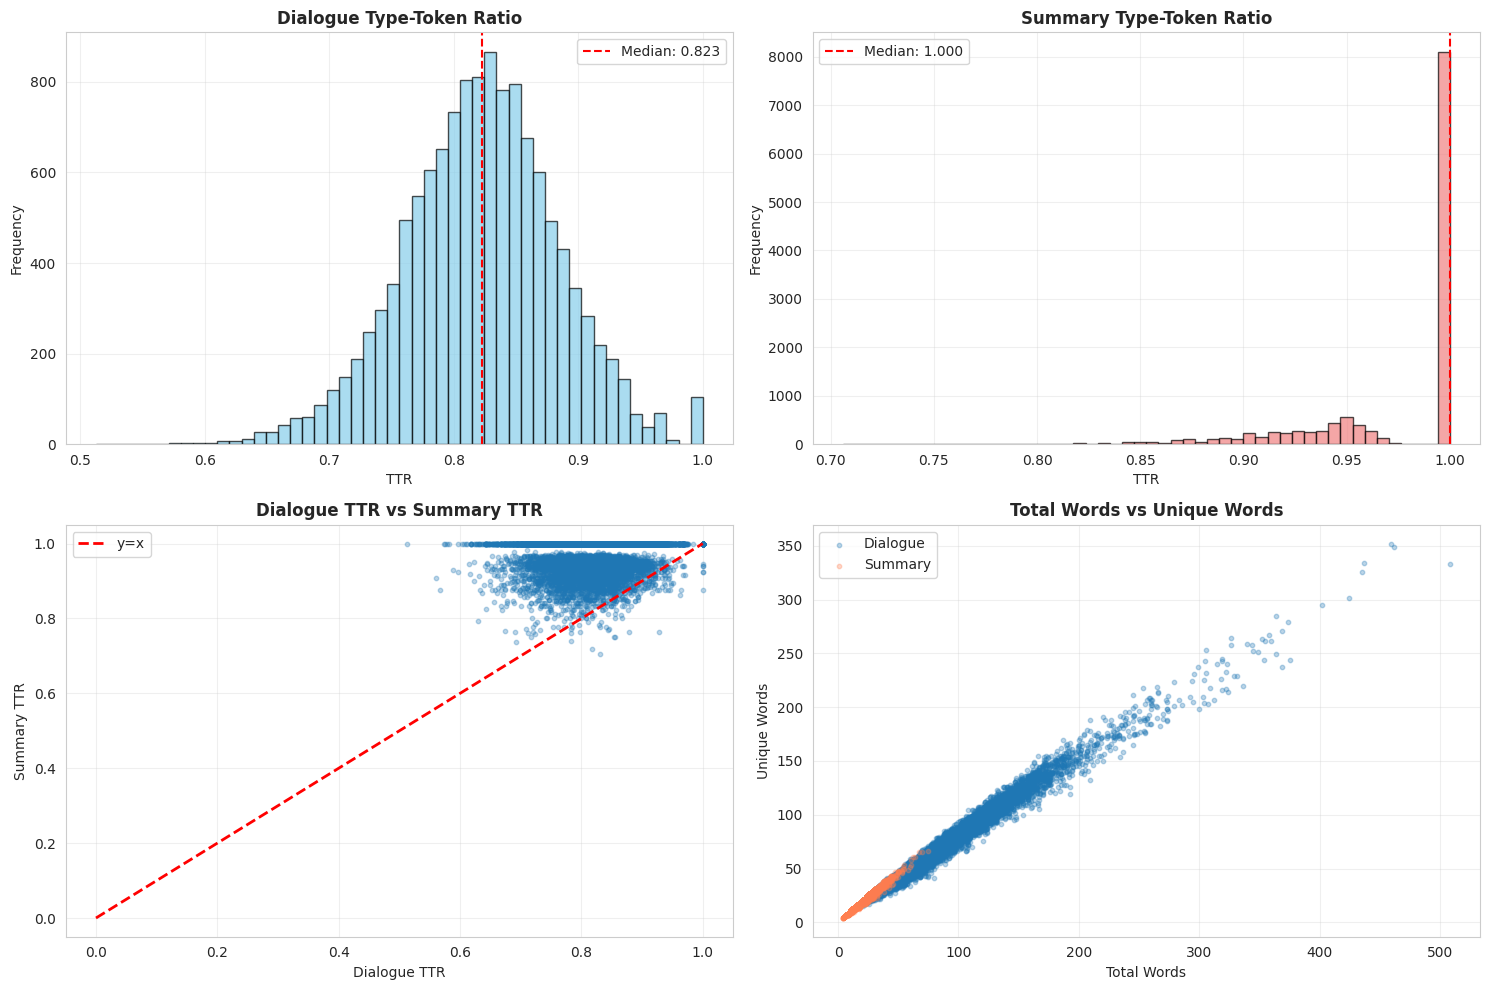


‚úÖ Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù ÏôÑÎ£å


In [15]:
# Ïñ¥Ìúò Îã§ÏñëÏÑ± Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_ttr(text):
    """Type-Token Ratio Í≥ÑÏÇ∞"""
    # Îã®Ïñ¥ Î∂ÑÎ¶¨ (Í≥µÎ∞± Í∏∞Ï§Ä)
    words = text.split()
    if len(words) == 0:
        return 0
    unique_words = len(set(words))
    total_words = len(words)
    return unique_words / total_words

def count_unique_words(text):
    """Í≥†Ïú† Îã®Ïñ¥ Ïàò"""
    words = text.split()
    return len(set(words))

def count_total_words(text):
    """Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò"""
    return len(text.split())

print("Ïñ¥Ìúò Îã§ÏñëÏÑ± Í≥ÑÏÇ∞ Ï§ë...\n")

# Train
train_df['dialogue_ttr'] = train_df['dialogue'].apply(calculate_ttr)
train_df['summary_ttr'] = train_df['summary'].apply(calculate_ttr)
train_df['dialogue_unique_words'] = train_df['dialogue'].apply(count_unique_words)
train_df['dialogue_total_words'] = train_df['dialogue'].apply(count_total_words)
train_df['summary_unique_words'] = train_df['summary'].apply(count_unique_words)
train_df['summary_total_words'] = train_df['summary'].apply(count_total_words)

# ÌÜµÍ≥Ñ
print("="*80)
print("Ïñ¥Ìúò Îã§ÏñëÏÑ± ÌÜµÍ≥Ñ (Train)")
print("="*80)
print("\n[Dialogue TTR]")
print(train_df['dialogue_ttr'].describe())
print("\n[Summary TTR]")
print(train_df['summary_ttr'].describe())
print("\n[Dialogue ÌèâÍ∑† Îã®Ïñ¥ Ïàò]")
print(f"  Í≥†Ïú†: {train_df['dialogue_unique_words'].mean():.1f}, Ï†ÑÏ≤¥: {train_df['dialogue_total_words'].mean():.1f}")
print("[Summary ÌèâÍ∑† Îã®Ïñ¥ Ïàò]")
print(f"  Í≥†Ïú†: {train_df['summary_unique_words'].mean():.1f}, Ï†ÑÏ≤¥: {train_df['summary_total_words'].mean():.1f}")

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Dialogue TTR Î∂ÑÌè¨
axes[0, 0].hist(train_df['dialogue_ttr'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(train_df['dialogue_ttr'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["dialogue_ttr"].median():.3f}')
axes[0, 0].set_title('Dialogue Type-Token Ratio', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('TTR')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Summary TTR Î∂ÑÌè¨
axes[0, 1].hist(train_df['summary_ttr'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].axvline(train_df['summary_ttr'].median(), color='red', linestyle='--', 
                   label=f'Median: {train_df["summary_ttr"].median():.3f}')
axes[0, 1].set_title('Summary Type-Token Ratio', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('TTR')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Dialogue vs Summary TTR ÎπÑÍµê
axes[1, 0].scatter(train_df['dialogue_ttr'], train_df['summary_ttr'], alpha=0.3, s=10)
axes[1, 0].plot([0, 1], [0, 1], 'r--', linewidth=2, label='y=x')
axes[1, 0].set_title('Dialogue TTR vs Summary TTR', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Dialogue TTR')
axes[1, 0].set_ylabel('Summary TTR')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Í≥†Ïú† Îã®Ïñ¥ Ïàò vs Ï†ÑÏ≤¥ Îã®Ïñ¥ Ïàò
axes[1, 1].scatter(train_df['dialogue_total_words'], train_df['dialogue_unique_words'], alpha=0.3, s=10, label='Dialogue')
axes[1, 1].scatter(train_df['summary_total_words'], train_df['summary_unique_words'], alpha=0.3, s=10, label='Summary', color='coral')
axes[1, 1].set_title('Total Words vs Unique Words', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Total Words')
axes[1, 1].set_ylabel('Unique Words')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n‚úÖ Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù ÏôÑÎ£å")

## 12. N-gram Î∂ÑÏÑù

**Î™©Ï†Å**: ÏûêÏ£º Îì±Ïû•ÌïòÎäî ÌëúÌòÑ Ìå®ÌÑ¥ ÌååÏïÖ
- Bi-gram (2-gram)
- Tri-gram (3-gram)
- SummaryÏóêÏÑú ÏûêÏ£º ÏÇ¨Ïö©ÎêòÎäî ÌëúÌòÑ

n-gram Ï∂îÏ∂ú Ï§ë...

[Bi-gram Top 30] (Summary)
#Person2#Îäî #Person1#ÏóêÍ≤å                  : 1127
#Person1#ÏùÄ #Person2#ÏóêÍ≤å                  : 1086
#Person1#Í≥º #Person2#Îäî                   :  970
#Person1#Ïù¥ #Person2#ÏóêÍ≤å                  :  319
#Person1#ÏùÄ #Person2#Ïùò                   :  311
Ïàò ÏûàÎã§Í≥†                                   :  288
ÎåÄÌï¥ Ïù¥ÏïºÍ∏∞Ìï©ÎãàÎã§.                              :  264
#Person2#Í∞Ä #Person1#ÏóêÍ≤å                  :  234
#Person1#ÏùÄ #Person2#Í∞Ä                   :  227
#Person2#Îäî #Person1#Ïùò                   :  216
ÎåÄÌï¥ ÏÑ§Î™ÖÌï©ÎãàÎã§.                               :  178
ÎåÄÌï¥ Ïù¥ÏïºÍ∏∞ÌïúÎã§.                               :  161
#Person2#Îäî #Person1#Ïù¥                   :  152
Ïàò ÏûàÎäî                                    :  124
Ïàò ÏûàÎèÑÎ°ù                                   :  118
Í≤ÉÏóê ÎåÄÌï¥                                   :  116
ÏûàÏäµÎãàÎã§. #Person1#ÏùÄ                        :  112
Îëê ÏÇ¨ÎûåÏùÄ           

/tmp/ipykernel_3489856/2611393886.py:61: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/2611393886.py:61: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/2611393886.py:61: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/2611393886.py:61: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/2611393886.py:61: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/2611393886.py:61: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/2611393886.py:61: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu 

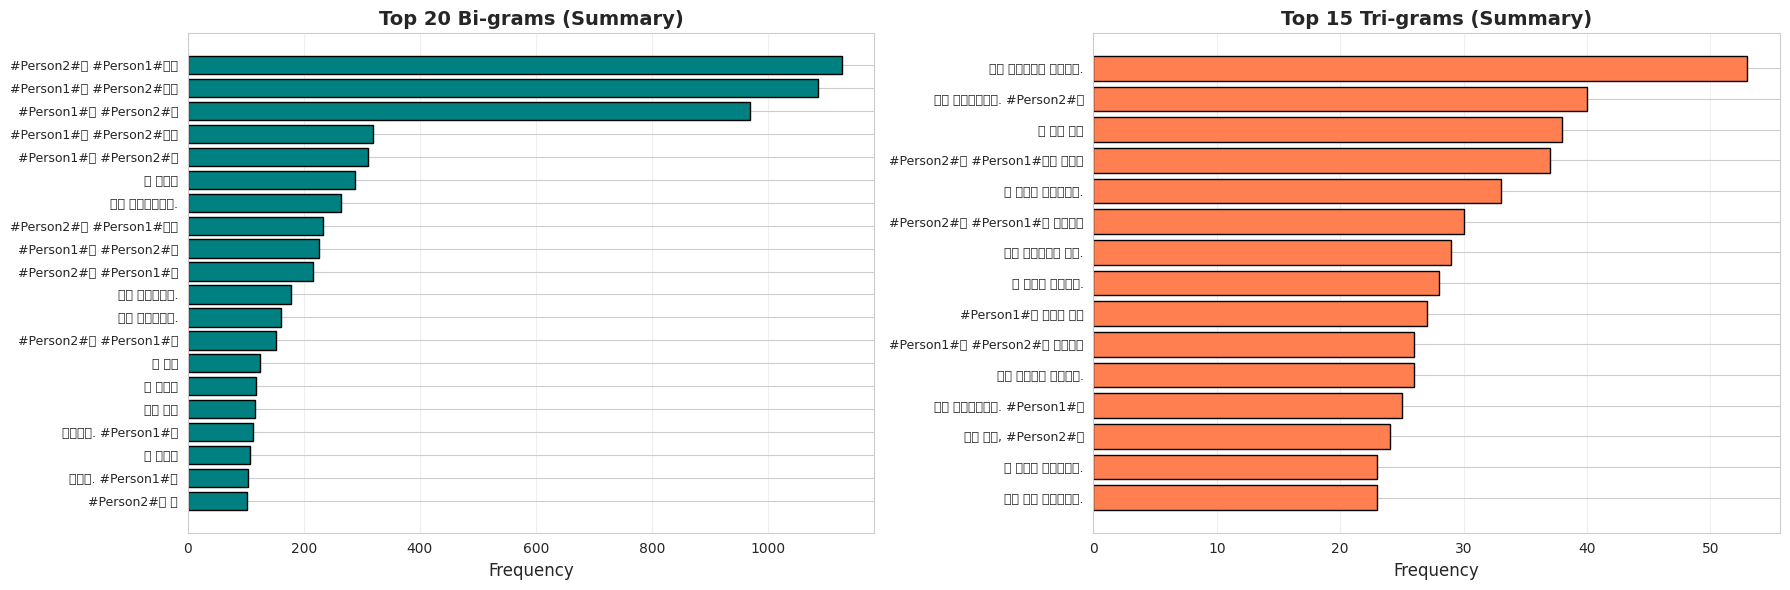


‚úÖ n-gram Î∂ÑÏÑù ÏôÑÎ£å


In [16]:
from collections import Counter
import itertools

def extract_ngrams(text, n=2):
    """n-gram Ï∂îÏ∂ú"""
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]

print("n-gram Ï∂îÏ∂ú Ï§ë...\n")

# SummaryÏóêÏÑú Bi-gram Ï∂îÏ∂ú
all_bigrams = []
for summary in train_df['summary']:
    all_bigrams.extend(extract_ngrams(summary, n=2))

bigram_counts = Counter(all_bigrams)
print("[Bi-gram Top 30] (Summary)")
print("="*80)
for bigram, count in bigram_counts.most_common(30):
    print(f"{bigram:40s}: {count:4d}")

# SummaryÏóêÏÑú Tri-gram Ï∂îÏ∂ú
all_trigrams = []
for summary in train_df['summary']:
    all_trigrams.extend(extract_ngrams(summary, n=3))

trigram_counts = Counter(all_trigrams)
print("\n[Tri-gram Top 20] (Summary)")
print("="*80)
for trigram, count in trigram_counts.most_common(20):
    print(f"{trigram:50s}: {count:4d}")

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top 20 Bi-grams
top_bigrams = bigram_counts.most_common(20)
bigrams = [b for b, c in top_bigrams]
counts_bi = [c for b, c in top_bigrams]

axes[0].barh(range(len(bigrams)), counts_bi[::-1], color='teal', edgecolor='black')
axes[0].set_yticks(range(len(bigrams)))
axes[0].set_yticklabels(bigrams[::-1], fontsize=9)
axes[0].set_xlabel('Frequency', fontsize=12)
axes[0].set_title('Top 20 Bi-grams (Summary)', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Top 15 Tri-grams
top_trigrams = trigram_counts.most_common(15)
trigrams = [t for t, c in top_trigrams]
counts_tri = [c for t, c in top_trigrams]

axes[1].barh(range(len(trigrams)), counts_tri[::-1], color='coral', edgecolor='black')
axes[1].set_yticks(range(len(trigrams)))
axes[1].set_yticklabels(trigrams[::-1], fontsize=9)
axes[1].set_xlabel('Frequency', fontsize=12)
axes[1].set_title('Top 15 Tri-grams (Summary)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n‚úÖ n-gram Î∂ÑÏÑù ÏôÑÎ£å")

## 13. ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå Î∂ÑÏÑù

**Î™©Ï†Å**: Î™®Îç∏Ïù¥ Ïñ¥Î†§ÏõåÌï† Ïàò ÏûàÎäî ÏÉòÌîå ÌäπÏÑ± ÌååÏïÖ
- Í∏¥ ÎåÄÌôî (ÏÉÅÏúÑ 10%)
- Î≥µÏû°Ìïú ÎåÄÌôî (ÌôîÏûê 3Î™Ö Ïù¥ÏÉÅ)
- 512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º
- ÎÇÆÏùÄ ÏïïÏ∂ï ÎπÑÏú® (Ï†ïÎ≥¥ Î∞ÄÎèÑ ÎÜíÏùå)

ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå Î∂ÑÏÑù

[Í∏¥ ÎåÄÌôî] (ÏÉÅÏúÑ 10%)
  Í∏∞Ï§Ä: 642 Î¨∏Ïûê Ïù¥ÏÉÅ
  ÏÉòÌîå Ïàò: 1,233
  ÌèâÍ∑† Í∏∏Ïù¥: 823 Î¨∏Ïûê
  ÏµúÎåÄ Í∏∏Ïù¥: 2165 Î¨∏Ïûê

[Î≥µÏû°Ìïú ÎåÄÌôî] (ÌôîÏûê 3Î™Ö Ïù¥ÏÉÅ)
  ÏÉòÌîå Ïàò: 122 (0.98%)
  ÌèâÍ∑† ÌôîÏûê Ïàò: 3.2
  ÏµúÎåÄ ÌôîÏûê Ïàò: 7

[512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º] (Truncation Î∞úÏÉù)
  ÏÉòÌîå Ïàò: 136 (1.09%)
  ÌèâÍ∑† ÌÜ†ÌÅ∞ Ïàò: 638
  ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: 1079

[ÎÇÆÏùÄ ÏïïÏ∂ï ÎπÑÏú®] (ÌïòÏúÑ 10%, Ï†ïÎ≥¥ Î∞ÄÎèÑ ÎÜíÏùå)
  Í∏∞Ï§Ä: 2.98x ÎØ∏Îßå
  ÏÉòÌîå Ïàò: 1,246
  ÌèâÍ∑† ÏïïÏ∂ï ÎπÑÏú®: 2.47x

[Î≥µÌï© Î¨∏Ï†ú ÏÉòÌîå] (2Í∞ú Ïù¥ÏÉÅ Ï°∞Í±¥ ÎßåÏ°±)
  ÏÉòÌîå Ïàò: 157 (1.26%)



/tmp/ipykernel_3489856/607035634.py:103: UserWarning: Glyph 44596 (\N{HANGUL SYLLABLE GIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/607035634.py:103: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/607035634.py:103: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/607035634.py:103: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/607035634.py:103: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/607035634.py:103: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_3489856/607035634.py:103: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu

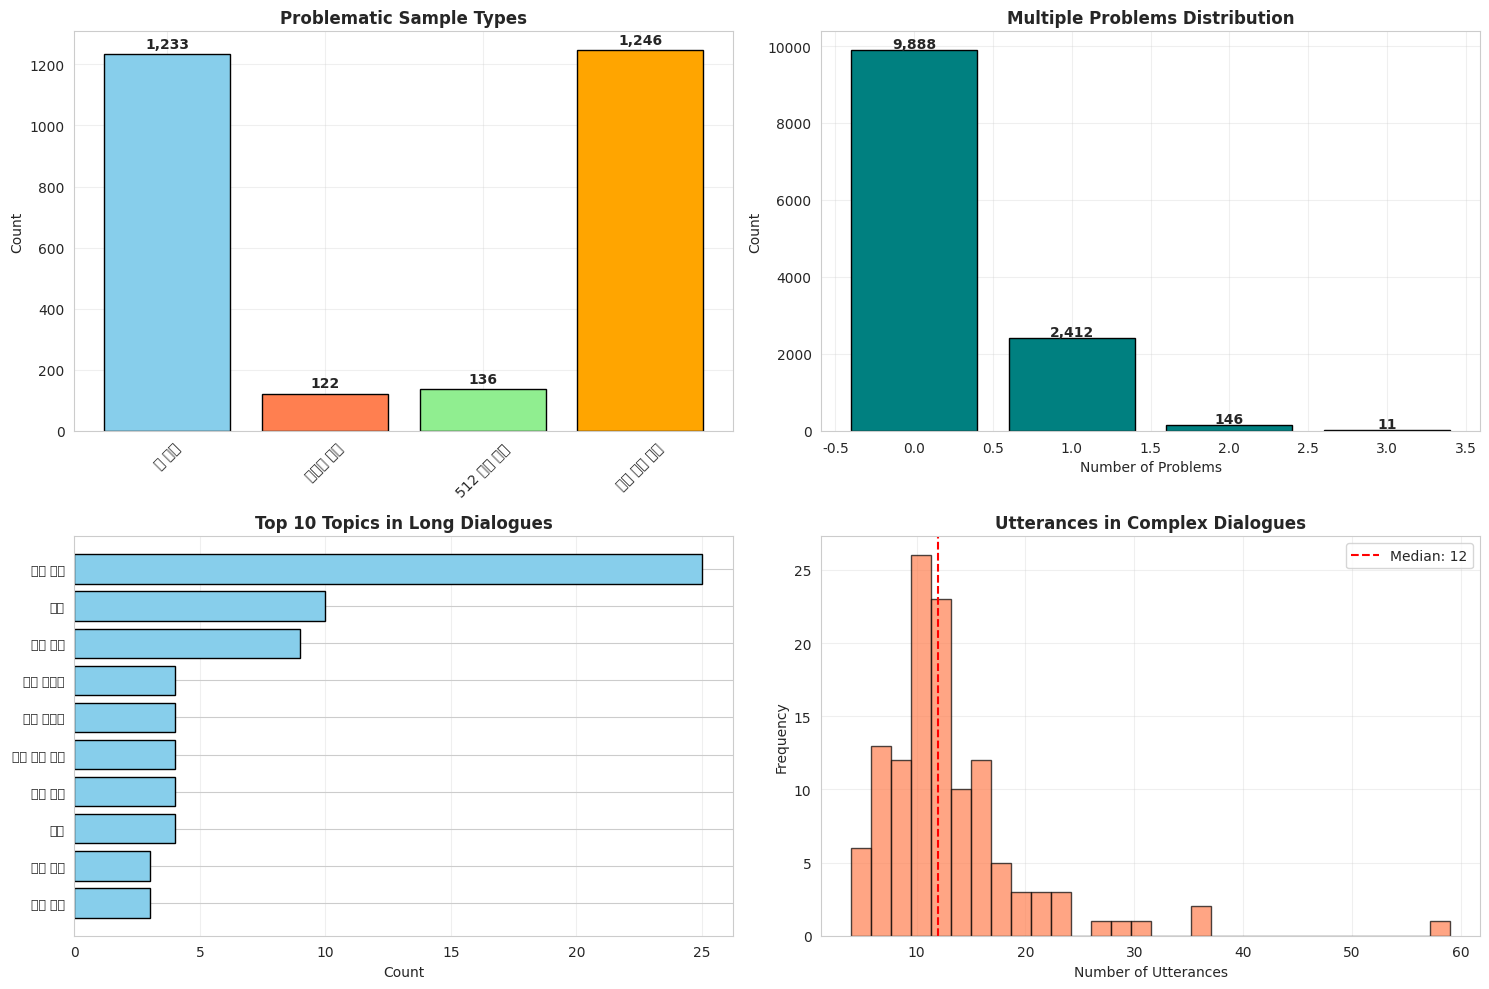

‚úÖ ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå Î∂ÑÏÑù ÏôÑÎ£å


In [17]:
print("ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå Î∂ÑÏÑù\n")
print("="*80)

# 1. Í∏¥ ÎåÄÌôî (ÏÉÅÏúÑ 10%)
dialogue_len_90 = train_df['dialogue_len'].quantile(0.9)
long_dialogues = train_df[train_df['dialogue_len'] > dialogue_len_90]
print(f"[Í∏¥ ÎåÄÌôî] (ÏÉÅÏúÑ 10%)")
print(f"  Í∏∞Ï§Ä: {dialogue_len_90:.0f} Î¨∏Ïûê Ïù¥ÏÉÅ")
print(f"  ÏÉòÌîå Ïàò: {len(long_dialogues):,}")
print(f"  ÌèâÍ∑† Í∏∏Ïù¥: {long_dialogues['dialogue_len'].mean():.0f} Î¨∏Ïûê")
print(f"  ÏµúÎåÄ Í∏∏Ïù¥: {long_dialogues['dialogue_len'].max():.0f} Î¨∏Ïûê")
print()

# 2. Î≥µÏû°Ìïú ÎåÄÌôî (ÌôîÏûê 3Î™Ö Ïù¥ÏÉÅ)
complex_dialogues = train_df[train_df['num_speakers'] >= 3]
print(f"[Î≥µÏû°Ìïú ÎåÄÌôî] (ÌôîÏûê 3Î™Ö Ïù¥ÏÉÅ)")
print(f"  ÏÉòÌîå Ïàò: {len(complex_dialogues):,} ({len(complex_dialogues)/len(train_df)*100:.2f}%)")
print(f"  ÌèâÍ∑† ÌôîÏûê Ïàò: {complex_dialogues['num_speakers'].mean():.1f}")
print(f"  ÏµúÎåÄ ÌôîÏûê Ïàò: {complex_dialogues['num_speakers'].max()}")
print()

# 3. 512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º
over_512_samples = train_df[train_df['dialogue_tokens'] > 512]
print(f"[512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º] (Truncation Î∞úÏÉù)")
print(f"  ÏÉòÌîå Ïàò: {len(over_512_samples):,} ({len(over_512_samples)/len(train_df)*100:.2f}%)")
print(f"  ÌèâÍ∑† ÌÜ†ÌÅ∞ Ïàò: {over_512_samples['dialogue_tokens'].mean():.0f}")
print(f"  ÏµúÎåÄ ÌÜ†ÌÅ∞ Ïàò: {over_512_samples['dialogue_tokens'].max()}")
print()

# 4. ÎÇÆÏùÄ ÏïïÏ∂ï ÎπÑÏú® (ÌïòÏúÑ 10%)
compression_10 = train_df['compression_ratio'].quantile(0.1)
low_compression = train_df[train_df['compression_ratio'] < compression_10]
print(f"[ÎÇÆÏùÄ ÏïïÏ∂ï ÎπÑÏú®] (ÌïòÏúÑ 10%, Ï†ïÎ≥¥ Î∞ÄÎèÑ ÎÜíÏùå)")
print(f"  Í∏∞Ï§Ä: {compression_10:.2f}x ÎØ∏Îßå")
print(f"  ÏÉòÌîå Ïàò: {len(low_compression):,}")
print(f"  ÌèâÍ∑† ÏïïÏ∂ï ÎπÑÏú®: {low_compression['compression_ratio'].mean():.2f}x")
print()

# 5. Î≥µÌï© Î¨∏Ï†ú ÏÉòÌîå (ÏúÑ Ï°∞Í±¥ Ï§ë 2Í∞ú Ïù¥ÏÉÅ ÎßåÏ°±)
train_df['is_long'] = train_df['dialogue_len'] > dialogue_len_90
train_df['is_complex'] = train_df['num_speakers'] >= 3
train_df['is_over_512'] = train_df['dialogue_tokens'] > 512
train_df['is_low_compression'] = train_df['compression_ratio'] < compression_10

train_df['problem_count'] = (train_df['is_long'].astype(int) + 
                              train_df['is_complex'].astype(int) + 
                              train_df['is_over_512'].astype(int) + 
                              train_df['is_low_compression'].astype(int))

multiple_problems = train_df[train_df['problem_count'] >= 2]
print(f"[Î≥µÌï© Î¨∏Ï†ú ÏÉòÌîå] (2Í∞ú Ïù¥ÏÉÅ Ï°∞Í±¥ ÎßåÏ°±)")
print(f"  ÏÉòÌîå Ïàò: {len(multiple_problems):,} ({len(multiple_problems)/len(train_df)*100:.2f}%)")
print()

# ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Î¨∏Ï†ú Ïú†ÌòïÎ≥Ñ ÏÉòÌîå Ïàò
problem_types = ['Í∏¥ ÎåÄÌôî', 'Î≥µÏû°Ìïú ÎåÄÌôî', '512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º', 'ÎÇÆÏùÄ ÏïïÏ∂ï ÎπÑÏú®']
problem_counts = [
    len(long_dialogues),
    len(complex_dialogues),
    len(over_512_samples),
    len(low_compression)
]
axes[0, 0].bar(problem_types, problem_counts, color=['skyblue', 'coral', 'lightgreen', 'orange'], edgecolor='black')
axes[0, 0].set_title('Problematic Sample Types', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(alpha=0.3)
for i, v in enumerate(problem_counts):
    axes[0, 0].text(i, v + 20, f'{v:,}', ha='center', fontweight='bold')

# Î≥µÌï© Î¨∏Ï†ú Î∂ÑÌè¨
problem_dist = train_df['problem_count'].value_counts().sort_index()
axes[0, 1].bar(problem_dist.index, problem_dist.values, color='teal', edgecolor='black')
axes[0, 1].set_title('Multiple Problems Distribution', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Number of Problems')
axes[0, 1].set_ylabel('Count')
axes[0, 1].grid(alpha=0.3)
for i, v in enumerate(problem_dist.values):
    axes[0, 1].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

# Í∏¥ ÎåÄÌôîÏùò Ï£ºÏ†ú Î∂ÑÌè¨ (ÏÉÅÏúÑ 10Í∞ú)
long_topics = long_dialogues['topic'].value_counts().head(10)
axes[1, 0].barh(range(len(long_topics)), long_topics.values[::-1], color='skyblue', edgecolor='black')
axes[1, 0].set_yticks(range(len(long_topics)))
axes[1, 0].set_yticklabels(long_topics.index[::-1], fontsize=9)
axes[1, 0].set_title('Top 10 Topics in Long Dialogues', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Count')
axes[1, 0].grid(axis='x', alpha=0.3)

# Î≥µÏû°Ìïú ÎåÄÌôîÏùò Î∞úÌôî Ïàò Î∂ÑÌè¨
axes[1, 1].hist(complex_dialogues['num_utterances'], bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1, 1].axvline(complex_dialogues['num_utterances'].median(), color='red', linestyle='--', 
                   label=f'Median: {complex_dialogues["num_utterances"].median():.0f}')
axes[1, 1].set_title('Utterances in Complex Dialogues', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Number of Utterances')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("‚úÖ ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå Î∂ÑÏÑù ÏôÑÎ£å")

## 14. Baseline ÏòàÏ∏° vs Ï†ïÎãµ ÎπÑÍµê (ÏÑ†ÌÉùÏ†Å)

**Î™©Ï†Å**: Baseline Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥º Î∂ÑÏÑù
- Ï†ÄÏÑ±Îä• ÏÉòÌîå ÌäπÏÑ± ÌååÏïÖ
- Í∞úÏÑ† Ìè¨Ïù∏Ìä∏ Î∞úÍ≤¨

**ÏöîÍµ¨ÏÇ¨Ìï≠**: `prediction/output.csv` ÌååÏùº ÌïÑÏöî (Dev set ÏòàÏ∏°)

Baseline ÏòàÏ∏° ÌååÏùº Î∞úÍ≤¨! Î∂ÑÏÑù ÏãúÏûë...

ROUGE Ï†êÏàò Î∂ÑÌè¨ (Dev set)

ROUGE-1 F1: 0.0069 (¬±0.0223)
ROUGE-2 F1: 0.0002 (¬±0.0033)
ROUGE-L F1: 0.0069 (¬±0.0223)
ÌèâÍ∑†:        0.0047 (¬±0.0153)

[Ï†ÄÏÑ±Îä• ÏÉòÌîå] (ÌïòÏúÑ 10%)
  ROUGE ÌèâÍ∑† < 0.0000
  ÏÉòÌîå Ïàò: 0
  ÌèâÍ∑† ÎåÄÌôî Í∏∏Ïù¥: nan Î¨∏Ïûê
  ÌèâÍ∑† ÌÜ†ÌÅ∞ Ïàò: nan tokens
  512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º: 0 samples


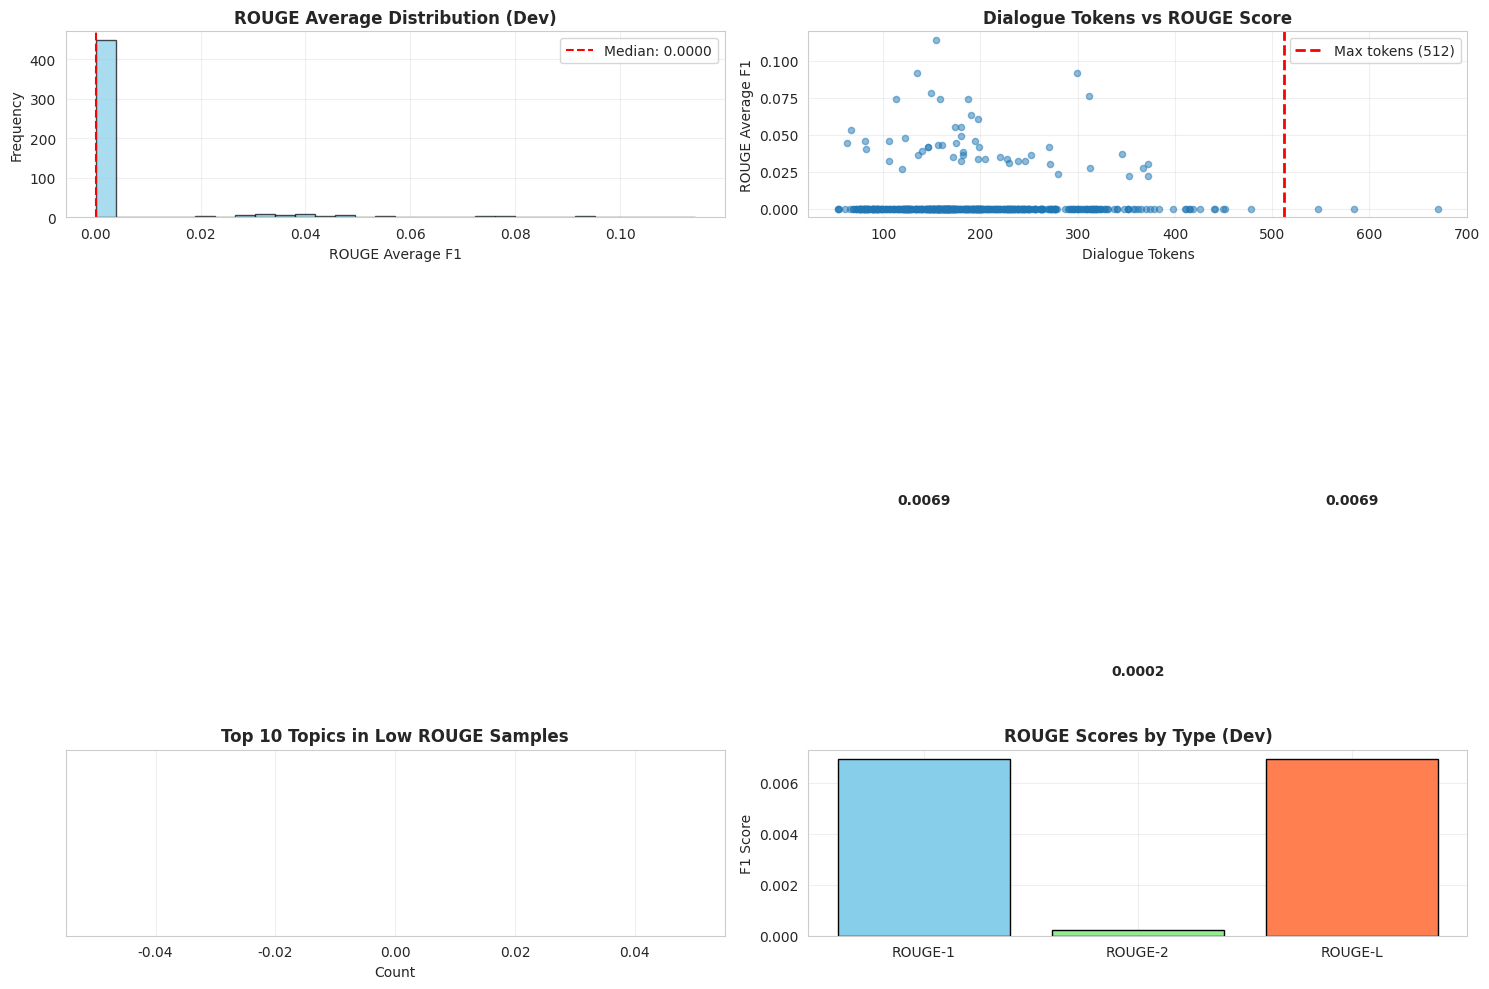


‚úÖ Baseline ÏòàÏ∏° Î∂ÑÏÑù ÏôÑÎ£å


In [22]:
import os
from rouge import Rouge

# Baseline ÏòàÏ∏° ÌååÏùº ÌôïÏù∏
prediction_path = './prediction/output_modular_v2.csv'

if os.path.exists(prediction_path):
    print("Baseline ÏòàÏ∏° ÌååÏùº Î∞úÍ≤¨! Î∂ÑÏÑù ÏãúÏûë...\n")
    
    # ÏòàÏ∏° ÌååÏùº Î°úÎìú
    pred_df = pd.read_csv(prediction_path)
    
    # Dev setÍ≥º Îß§Ïπ≠ (fname Í∏∞Ï§Ä)
    # pred_dfÏùò fnameÏù¥ test_0, test_1 ÌòïÏãùÏù¥Î©¥ dev_0, dev_1Î°ú Î≥ÄÌôò ÌïÑÏöî
    # ÎòêÎäî ÏàúÏÑúÎåÄÎ°ú Îß§Ïπ≠
    
    if len(pred_df) == len(dev_df):
        dev_df['predicted_summary'] = pred_df['summary'].values
        
        # ROUGE Ï†êÏàò Í≥ÑÏÇ∞
        rouge = Rouge()
        scores = []
        
        for i, row in dev_df.iterrows():
            try:
                score = rouge.get_scores(row['predicted_summary'], row['summary'])[0]
                scores.append({
                    'rouge-1-f': score['rouge-1']['f'],
                    'rouge-2-f': score['rouge-2']['f'],
                    'rouge-l-f': score['rouge-l']['f']
                })
            except:
                scores.append({'rouge-1-f': 0, 'rouge-2-f': 0, 'rouge-l-f': 0})
        
        score_df = pd.DataFrame(scores)
        dev_df['rouge_1_f'] = score_df['rouge-1-f']
        dev_df['rouge_2_f'] = score_df['rouge-2-f']
        dev_df['rouge_l_f'] = score_df['rouge-l-f']
        dev_df['rouge_avg'] = (dev_df['rouge_1_f'] + dev_df['rouge_2_f'] + dev_df['rouge_l_f']) / 3
        
        # ÌÜµÍ≥Ñ
        print("="*80)
        print("ROUGE Ï†êÏàò Î∂ÑÌè¨ (Dev set)")
        print("="*80)
        print(f"\nROUGE-1 F1: {dev_df['rouge_1_f'].mean():.4f} (¬±{dev_df['rouge_1_f'].std():.4f})")
        print(f"ROUGE-2 F1: {dev_df['rouge_2_f'].mean():.4f} (¬±{dev_df['rouge_2_f'].std():.4f})")
        print(f"ROUGE-L F1: {dev_df['rouge_l_f'].mean():.4f} (¬±{dev_df['rouge_l_f'].std():.4f})")
        print(f"ÌèâÍ∑†:        {dev_df['rouge_avg'].mean():.4f} (¬±{dev_df['rouge_avg'].std():.4f})")
        
        # Ï†ÄÏÑ±Îä• ÏÉòÌîå (ÌïòÏúÑ 10%)
        low_rouge_threshold = dev_df['rouge_avg'].quantile(0.1)
        low_rouge_samples = dev_df[dev_df['rouge_avg'] < low_rouge_threshold]
        
        print(f"\n[Ï†ÄÏÑ±Îä• ÏÉòÌîå] (ÌïòÏúÑ 10%)")
        print(f"  ROUGE ÌèâÍ∑† < {low_rouge_threshold:.4f}")
        print(f"  ÏÉòÌîå Ïàò: {len(low_rouge_samples)}")
        print(f"  ÌèâÍ∑† ÎåÄÌôî Í∏∏Ïù¥: {low_rouge_samples['dialogue_len'].mean():.0f} Î¨∏Ïûê")
        print(f"  ÌèâÍ∑† ÌÜ†ÌÅ∞ Ïàò: {low_rouge_samples['dialogue_tokens'].mean():.0f} tokens")
        print(f"  512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º: {(low_rouge_samples['dialogue_tokens'] > 512).sum()} samples")
        
        # ÏãúÍ∞ÅÌôî
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # ROUGE Ï†êÏàò Î∂ÑÌè¨
        axes[0, 0].hist(dev_df['rouge_avg'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].axvline(dev_df['rouge_avg'].median(), color='red', linestyle='--', 
                           label=f'Median: {dev_df["rouge_avg"].median():.4f}')
        axes[0, 0].set_title('ROUGE Average Distribution (Dev)', fontsize=12, fontweight='bold')
        axes[0, 0].set_xlabel('ROUGE Average F1')
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].legend()
        axes[0, 0].grid(alpha=0.3)
        
        # ÎåÄÌôî Í∏∏Ïù¥ vs ROUGE Ï†êÏàò
        axes[0, 1].scatter(dev_df['dialogue_tokens'], dev_df['rouge_avg'], alpha=0.5, s=20)
        axes[0, 1].axvline(512, color='red', linestyle='--', linewidth=2, label='Max tokens (512)')
        axes[0, 1].set_title('Dialogue Tokens vs ROUGE Score', fontsize=12, fontweight='bold')
        axes[0, 1].set_xlabel('Dialogue Tokens')
        axes[0, 1].set_ylabel('ROUGE Average F1')
        axes[0, 1].legend()
        axes[0, 1].grid(alpha=0.3)
        
        # Ï†ÄÏÑ±Îä• ÏÉòÌîåÏùò Ï£ºÏ†ú Î∂ÑÌè¨
        low_topics = low_rouge_samples['topic'].value_counts().head(10)
        axes[1, 0].barh(range(len(low_topics)), low_topics.values[::-1], color='coral', edgecolor='black')
        axes[1, 0].set_yticks(range(len(low_topics)))
        axes[1, 0].set_yticklabels(low_topics.index[::-1], fontsize=9)
        axes[1, 0].set_title('Top 10 Topics in Low ROUGE Samples', fontsize=12, fontweight='bold')
        axes[1, 0].set_xlabel('Count')
        axes[1, 0].grid(axis='x', alpha=0.3)
        
        # ROUGE-1, ROUGE-2, ROUGE-L ÎπÑÍµê
        rouge_types = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
        rouge_means = [
            dev_df['rouge_1_f'].mean(),
            dev_df['rouge_2_f'].mean(),
            dev_df['rouge_l_f'].mean()
        ]
        axes[1, 1].bar(rouge_types, rouge_means, color=['skyblue', 'lightgreen', 'coral'], edgecolor='black')
        axes[1, 1].set_title('ROUGE Scores by Type (Dev)', fontsize=12, fontweight='bold')
        axes[1, 1].set_ylabel('F1 Score')
        axes[1, 1].grid(alpha=0.3)
        for i, v in enumerate(rouge_means):
            axes[1, 1].text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        print("\n‚úÖ Baseline ÏòàÏ∏° Î∂ÑÏÑù ÏôÑÎ£å")
    else:
        print(f"‚ö†Ô∏è  ÏòàÏ∏° ÌååÏùº ÌÅ¨Í∏∞ Î∂àÏùºÏπò: {len(pred_df)} vs {len(dev_df)}")
else:
    print("‚ö†Ô∏è  Baseline ÏòàÏ∏° ÌååÏùºÏù¥ ÏóÜÏäµÎãàÎã§.")
    print(f"   Í≤ΩÎ°ú: {prediction_path}")
    print("   Baseline Î™®Îç∏ÏùÑ Î®ºÏ†Ä Ïã§ÌñâÌï¥ÏÑú Dev set ÏòàÏ∏°ÏùÑ ÏÉùÏÑ±ÌïòÏÑ∏Ïöî.")
    print("\n   Ïù¥ Î∂ÑÏÑùÏùÑ Í±¥ÎÑàÎõ∞Í≥† Í≥ÑÏÜç ÏßÑÌñâÌï©ÎãàÎã§.")

## 15. EDA ÏôÑÎ£å ÏöîÏïΩ

### ‚úÖ ÏôÑÎ£åÎêú Î∂ÑÏÑù:

1. **Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏** - Ïª¨Îüº, ÌÉÄÏûÖ, Í≤∞Ï∏°Ïπò
2. **ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÏÑù** - Î¨∏Ïûê Îã®ÏúÑ, ÏïïÏ∂ï ÎπÑÏú®
3. **Ï£ºÏ†ú Î∂ÑÌè¨** - 9,235Í∞ú Í≥†Ïú† Ï£ºÏ†ú
4. **ÌôîÏûê Î∂ÑÏÑù** - ÎåÄÎ∂ÄÎ∂Ñ 2Î™Ö ÎåÄÌôî
5. **Î∞úÌôî Î∂ÑÏÑù** - ÎåÄÌôî ÌÑ¥ Ïàò
6. **ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÏÑù** - KoBART tokenizer Í∏∞Ï§Ä
7. **ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù** - ÏãúÍ∞Ñ, Í∏àÏï°, Ï†ÑÌôîÎ≤àÌò∏ Îì±
8. **PII ÎßàÏä§ÌÇπ Î∂ÑÏÑù** - Í∞úÏù∏Ï†ïÎ≥¥ ÎßàÏä§ÌÇπ Ìå®ÌÑ¥
9. **Î¨∏Ïû• Ïàò Î∂ÑÏÑù** - Î¨∏Ïû• Îã®ÏúÑ ÏïïÏ∂ï ÎπÑÏú®
10. **Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù** - Type-Token Ratio
11. **N-gram Î∂ÑÏÑù** - ÏûêÏ£º ÏÇ¨Ïö©ÎêòÎäî ÌëúÌòÑ
12. **ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå** - Í∏¥ ÎåÄÌôî, Î≥µÏû°Ìïú Íµ¨Ï°∞
13. **Baseline ÏòàÏ∏° ÎπÑÍµê** - ROUGE Ï†êÏàò Î∂ÑÏÑù (Ï°∞Í±¥Î∂Ä)

### üí° Îã§Ïùå Îã®Í≥Ñ:

**Î∂ÑÏÑù Í≤∞Í≥º Í∏∞Î∞ò Í∞úÏÑ† Ï†ÑÎûµ**:
1. 512 ÌÜ†ÌÅ∞ Ï¥àÍ≥º ÏÉòÌîå Ï≤òÎ¶¨ Î∞©Ïïà
2. Special Token Ï∂îÍ∞Ä (ÏãúÍ∞Ñ, Í∏àÏï° Îì± Í≥†ÎπàÎèÑ Ìå®ÌÑ¥)
3. Í∏¥ ÎåÄÌôî/Î≥µÏû°Ìïú Íµ¨Ï°∞ ÏÉòÌîå Í∞ïÌôî ÌïôÏäµ
4. Ï†ÄÏÑ±Îä• Ï£ºÏ†ú ÏßëÏ§ë ÌïôÏäµ

In [19]:
# Ï†ÑÏ≤¥ EDA ÏôÑÎ£å
print("\n" + "="*80)
print("Ï†ÑÏ≤¥ EDA ÏôÑÎ£å")
print("="*80)
print("\nüìä Î∂ÑÏÑù Ìï≠Î™© (13Í∞ú):")
print("  ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏")
print("  ‚úÖ 2. ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÏÑù")
print("  ‚úÖ 3. Ï£ºÏ†ú Î∂ÑÌè¨")
print("  ‚úÖ 4. ÌôîÏûê Î∂ÑÏÑù")
print("  ‚úÖ 5. Î∞úÌôî Î∂ÑÏÑù")
print("  ‚úÖ 6. ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÏÑù (KoBART)")
print("  ‚úÖ 7. ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("  ‚úÖ 8. PII ÎßàÏä§ÌÇπ Î∂ÑÏÑù")
print("  ‚úÖ 9. Î¨∏Ïû• Ïàò Î∂ÑÏÑù")
print("  ‚úÖ 10. Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù")
print("  ‚úÖ 11. N-gram Î∂ÑÏÑù")
print("  ‚úÖ 12. ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå Î∂ÑÏÑù")
print("  ‚úÖ 13. Baseline ÏòàÏ∏° ÎπÑÍµê (Ï°∞Í±¥Î∂Ä)")
print("\nüí° Ïù¥Ï†ú Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú Î™®Îç∏ Í∞úÏÑ†ÏùÑ ÏßÑÌñâÌïòÏÑ∏Ïöî!")
print("\nüìÅ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÏàò:")
print("  - train_df: Ï†ÑÏ≤¥ Train Îç∞Ïù¥ÌÑ∞ + Î∂ÑÏÑù Í≤∞Í≥º")
print("  - dev_df: Ï†ÑÏ≤¥ Dev Îç∞Ïù¥ÌÑ∞ + Î∂ÑÏÑù Í≤∞Í≥º")
print("  - test_df: Ï†ÑÏ≤¥ Test Îç∞Ïù¥ÌÑ∞ + Î∂ÑÏÑù Í≤∞Í≥º")


Ï†ÑÏ≤¥ EDA ÏôÑÎ£å

üìä Î∂ÑÏÑù Ìï≠Î™© (13Í∞ú):
  ‚úÖ 1. Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏
  ‚úÖ 2. ÌÖçÏä§Ìä∏ Í∏∏Ïù¥ Î∂ÑÏÑù
  ‚úÖ 3. Ï£ºÏ†ú Î∂ÑÌè¨
  ‚úÖ 4. ÌôîÏûê Î∂ÑÏÑù
  ‚úÖ 5. Î∞úÌôî Î∂ÑÏÑù
  ‚úÖ 6. ÌÜ†ÌÅ∞ Í∏∏Ïù¥ Î∂ÑÏÑù (KoBART)
  ‚úÖ 7. ÌäπÏàò Ìå®ÌÑ¥ Î∂ÑÏÑù
  ‚úÖ 8. PII ÎßàÏä§ÌÇπ Î∂ÑÏÑù
  ‚úÖ 9. Î¨∏Ïû• Ïàò Î∂ÑÏÑù
  ‚úÖ 10. Ïñ¥Ìúò Îã§ÏñëÏÑ± Î∂ÑÏÑù
  ‚úÖ 11. N-gram Î∂ÑÏÑù
  ‚úÖ 12. ÏÑ±Îä• Î¨∏Ï†ú ÏÉòÌîå Î∂ÑÏÑù
  ‚úÖ 13. Baseline ÏòàÏ∏° ÎπÑÍµê (Ï°∞Í±¥Î∂Ä)

üí° Ïù¥Ï†ú Î∂ÑÏÑù Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú Î™®Îç∏ Í∞úÏÑ†ÏùÑ ÏßÑÌñâÌïòÏÑ∏Ïöî!

üìÅ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ÄÏàò:
  - train_df: Ï†ÑÏ≤¥ Train Îç∞Ïù¥ÌÑ∞ + Î∂ÑÏÑù Í≤∞Í≥º
  - dev_df: Ï†ÑÏ≤¥ Dev Îç∞Ïù¥ÌÑ∞ + Î∂ÑÏÑù Í≤∞Í≥º
  - test_df: Ï†ÑÏ≤¥ Test Îç∞Ïù¥ÌÑ∞ + Î∂ÑÏÑù Í≤∞Í≥º
